<a href="https://colab.research.google.com/github/jyoti-2203/Python/blob/EDA/EDA_Assignment_NYC_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

#Problem Statement
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

#Tasks
You need to perform the following steps for successfully completing this assignment:

Data Loading

Data Cleaning


Exploratory Analysis: Bivariate and Multivariate

Creating Visualisations to Support the Analysis

Deriving Insights and Stating Conclusions

#Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (.parquet). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps.

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

#1 Data Preparation

Import Libraries

In [8]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
#pip install pyarrow


In [10]:
!pip install pyarrow

In [11]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq


In [12]:
# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("pyarrow version:", pa.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2
pyarrow version: 18.1.0


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Try loading one file 2023-1.parquet

#df = pd.read_parquet('2023-1.parquet')
#df.head()

In [15]:
# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/NYC_Taxi/Datasets_and_Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        temp_df = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        temp_df['tpep_pickup_datetime'] = pd.to_datetime(temp_df['tpep_pickup_datetime'])
            # Iterate through each hour of the selected date
        temp_df['date'] = temp_df['tpep_pickup_datetime'].dt.date
        temp_df['hour'] = temp_df['tpep_pickup_datetime'].dt.hour
# Group data by date and hour
        grouped = temp_df.groupby(['date', 'hour'])
# Iterate through each group and sample 5% of the data
        for (date, hour), group in grouped:
            sample = group.sample(frac=0.05, random_state=42)
            sampled_data = pd.concat([sampled_data, sample])
                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])
        print(f"Successfully read and sampled data from {file_name}")
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")


Successfully read and sampled data from 2023-1.parquet
Successfully read and sampled data from 2023-2.parquet
Successfully read and sampled data from 2023-3.parquet
Successfully read and sampled data from 2023-4.parquet
Successfully read and sampled data from 2023-5.parquet
Successfully read and sampled data from 2023-6.parquet
Successfully read and sampled data from 2023-7.parquet
Successfully read and sampled data from 2023-8.parquet
Successfully read and sampled data from 2023-9.parquet
Successfully read and sampled data from 2023-10.parquet
Successfully read and sampled data from 2023-11.parquet
Successfully read and sampled data from 2023-12.parquet
Error reading file sampled_data.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Successfully read and sampled data from sampled_nyc_taxi_data.parquet
Error reading file sampled_nyc_taxi_data.csv: Could not open Parquet input source

In [16]:
# Store the df in csv/parquet
df.to_csv('sampled_data.csv', index=False)

In [17]:
# prompt: # Load the new data file

# Load the new data file
import pandas as pd

df = pd.read_csv('sampled_data.csv')
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2022-12-31 23:51:30,2022-12-31 23:56:06,1.0,0.86,1.0,N,141,140,1,...,0.5,2.00,0.0,1.0,13.50,2.5,0.00,2022-12-31,23,NaN
1,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
2,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN


In [18]:
df1 = df.copy()
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2022-12-31 23:51:30,2022-12-31 23:56:06,1.0,0.86,1.0,N,141,140,1,...,0.5,2.00,0.0,1.0,13.50,2.5,0.00,2022-12-31,23,NaN
1,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
2,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911123 entries, 0 to 1911122
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  date                   object 
 20  hour                   int64  
 21  Airport_fee            float64
dtypes: float64(13), in

In [20]:
df.shape

(1911123, 22)

In [21]:
#Ideally, you can try keeping the total entries to around 250,000 to 300,000.

# After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.
# Ideally, you can try keeping the total entries to around 250,000 to 300,000.

# Check the current number of rows
print(f"Number of rows in the combined DataFrame: {len(df)}")

# If the number of rows exceeds the desired limit, sample down to the target size
if len(df) > 300000:
    df = df.sample(n=300000, random_state=42)  # Sample 300,000 rows randomly
    print("DataFrame has been downsampled to 300,000 rows.")
    print(f"Number of rows in the downsampled DataFrame: {len(df)}")

# Save the DataFrame to a parquet file (more efficient for large datasets)
df.to_parquet('sampled_nyc_taxi_data.parquet', index=False)
print("DataFrame saved to 'sampled_nyc_taxi_data.parquet'")

# Alternatively, save as a CSV (less efficient for large datasets)
# df.to_csv('sampled_nyc_taxi_data.csv', index=False)
# print("DataFrame saved to 'sampled_nyc_taxi_data.csv'")


Number of rows in the combined DataFrame: 1911123
DataFrame has been downsampled to 300,000 rows.
Number of rows in the downsampled DataFrame: 300000
DataFrame saved to 'sampled_nyc_taxi_data.parquet'


In [22]:
# Store the df in csv/parquet
print(f"Number of rows in the combined DataFrame: {len(df)}")

# If the number of rows exceeds the desired limit, sample down to the target size
if len(df) > 300000:
    df = df.sample(n=300000, random_state=42)  # Sample 300,000 rows randomly
    print("DataFrame has been downsampled to 300,000 rows.")
    print(f"Number of rows in the downsampled DataFrame: {len(df)}")

# Save the DataFrame to a parquet file (more efficient for large datasets)
df.to_csv('sampled_nyc_taxi_data.csv', index=False)
print("DataFrame saved to 'sampled_nyc_taxi_data.csv'")

Number of rows in the combined DataFrame: 300000
DataFrame saved to 'sampled_nyc_taxi_data.csv'


In [23]:
df1 = df.copy()
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
1831235,2,2023-12-17 09:19:16,2023-12-17 09:34:55,1.0,2.58,1.0,N,107,230,1,...,0.5,2.50,0.0,1.0,23.50,2.5,NaN,2023-12-17,9,0.0
37431,2,2023-01-09 14:07:12,2023-01-09 14:15:49,1.0,1.28,1.0,N,211,261,1,...,0.5,2.80,0.0,1.0,16.80,2.5,0.00,2023-01-09,14,NaN
43407,2,2023-01-10 18:08:52,2023-01-10 18:21:36,1.0,2.17,1.0,N,13,79,1,...,0.5,6.21,0.0,1.0,26.91,2.5,0.00,2023-01-10,18,NaN
768681,1,2023-04-01 00:22:22,2023-04-01 00:48:00,1.0,4.90,1.0,N,263,79,1,...,0.5,6.20,0.0,1.0,37.30,2.5,NaN,2023-04-01,0,0.0
30884,2,2023-01-07 22:26:46,2023-01-07 22:36:29,1.0,4.97,1.0,N,132,130,2,...,0.5,0.00,0.0,1.0,24.95,0.0,1.25,2023-01-07,22,NaN


#2 Data Cleaning

Now we can load the new data directly.

In [24]:
df1 = pd.read_csv('sampled_nyc_taxi_data.csv')

In [25]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-12-17 09:19:16,2023-12-17 09:34:55,1.0,2.58,1.0,N,107,230,1,...,0.5,2.50,0.0,1.0,23.50,2.5,NaN,2023-12-17,9,0.0
1,2,2023-01-09 14:07:12,2023-01-09 14:15:49,1.0,1.28,1.0,N,211,261,1,...,0.5,2.80,0.0,1.0,16.80,2.5,0.00,2023-01-09,14,NaN
2,2,2023-01-10 18:08:52,2023-01-10 18:21:36,1.0,2.17,1.0,N,13,79,1,...,0.5,6.21,0.0,1.0,26.91,2.5,0.00,2023-01-10,18,NaN
3,1,2023-04-01 00:22:22,2023-04-01 00:48:00,1.0,4.90,1.0,N,263,79,1,...,0.5,6.20,0.0,1.0,37.30,2.5,NaN,2023-04-01,0,0.0
4,2,2023-01-07 22:26:46,2023-01-07 22:36:29,1.0,4.97,1.0,N,132,130,2,...,0.5,0.00,0.0,1.0,24.95,0.0,1.25,2023-01-07,22,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 1831235 to 821787
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289806 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289806 non-null  float64
 6   store_and_fwd_flag     289806 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-n

#2.1 Fixing Columns

Fix/drop any columns as you seem necessary in the below sections



##2.1.1

Fix the index and drop unnecessary columns

In [27]:
# Fix the index and drop any columns that are not needed
df1 = df1.reset_index(drop=True)

# Drop unnecessary columns (example - 'Unnamed: 0' if present)
if 'Unnamed: 0' in df1.columns:
    df1 = df1.drop('Unnamed: 0', axis=1)

df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-12-17 09:19:16,2023-12-17 09:34:55,1.0,2.58,1.0,N,107,230,1,...,0.5,2.50,0.0,1.0,23.50,2.5,NaN,2023-12-17,9,0.0
1,2,2023-01-09 14:07:12,2023-01-09 14:15:49,1.0,1.28,1.0,N,211,261,1,...,0.5,2.80,0.0,1.0,16.80,2.5,0.00,2023-01-09,14,NaN
2,2,2023-01-10 18:08:52,2023-01-10 18:21:36,1.0,2.17,1.0,N,13,79,1,...,0.5,6.21,0.0,1.0,26.91,2.5,0.00,2023-01-10,18,NaN
3,1,2023-04-01 00:22:22,2023-04-01 00:48:00,1.0,4.90,1.0,N,263,79,1,...,0.5,6.20,0.0,1.0,37.30,2.5,NaN,2023-04-01,0,0.0
4,2,2023-01-07 22:26:46,2023-01-07 22:36:29,1.0,4.97,1.0,N,132,130,2,...,0.5,0.00,0.0,1.0,24.95,0.0,1.25,2023-01-07,22,NaN


##2.1.2 [3 marks]
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [28]:
# Combine the two airport fee columns
if 'Airport_fee' in df1.columns and 'airport_fee' in df1.columns:
    # Combine values, prioritizing 'Airport_fee' if both have values
    df1['airport_fee'] = df1.apply(lambda row: row['Airport_fee'] if pd.notna(row['Airport_fee']) else row['airport_fee'], axis=1)
    # Drop the original columns
    df1 = df1.drop(['Airport_fee'], axis=1)
elif 'Airport_fee' in df1.columns:
    df1.rename(columns={'Airport_fee': 'airport_fee'}, inplace=True)
elif 'airport_fee' not in df1.columns:
    print("Neither 'Airport_fee' nor 'airport_fee' columns found in the dataframe")

df1.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour
0,2,2023-12-17 09:19:16,2023-12-17 09:34:55,1.0,2.58,1.0,N,107,230,1,...,0.0,0.5,2.50,0.0,1.0,23.50,2.5,0.00,2023-12-17,9
1,2,2023-01-09 14:07:12,2023-01-09 14:15:49,1.0,1.28,1.0,N,211,261,1,...,0.0,0.5,2.80,0.0,1.0,16.80,2.5,0.00,2023-01-09,14
2,2,2023-01-10 18:08:52,2023-01-10 18:21:36,1.0,2.17,1.0,N,13,79,1,...,2.5,0.5,6.21,0.0,1.0,26.91,2.5,0.00,2023-01-10,18
3,1,2023-04-01 00:22:22,2023-04-01 00:48:00,1.0,4.90,1.0,N,263,79,1,...,3.5,0.5,6.20,0.0,1.0,37.30,2.5,0.00,2023-04-01,0
4,2,2023-01-07 22:26:46,2023-01-07 22:36:29,1.0,4.97,1.0,N,132,130,2,...,1.0,0.5,0.00,0.0,1.0,24.95,0.0,1.25,2023-01-07,22


##2.1.3 [5 marks]
Fix columns with negative (monetary) values

In [29]:
# check where values of fare amount are negative
df1[df1['fare_amount'] < 0.0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour


Did you notice something different in the RatecodeID column for above records?

In [30]:
# Analyse RatecodeID for the negative fare amounts
df1['RatecodeID']

,RatecodeID
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
299995,1.0
299996,1.0
299997,2.0
299998,1.0


In [31]:
# Find which columns have negative values

negative_value_columns = []
for col in df1.columns:
    if pd.api.types.is_numeric_dtype(df1[col]):  # Check if the column is numeric
        if (df1[col] < 0).any():
            negative_value_columns.append(col)

print("Columns with negative values:", negative_value_columns)

Columns with negative values: ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [32]:
# fix these negative values
negative_fare_indices = df1[df1['fare_amount'] < 0].index
print(f"Number of negative fare amounts: {len(negative_fare_indices)}")

# Analyze RatecodeID for negative fare amounts
negative_fare_ratecodes = df1.loc[negative_fare_indices, 'RatecodeID']
print(f"RatecodeID values for negative fare amounts:\n{negative_fare_ratecodes.value_counts()}")

# Example: Replace negative fare amounts with 0 (or handle them differently based on your analysis)
df1.loc[df1['fare_amount'] < 0, 'fare_amount'] = 0

# Repeat for other monetary columns (e.g., tip_amount, tolls_amount, total_amount, etc.)
monetary_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

for col in monetary_columns:
    if col in df1.columns:
      df1.loc[df1[col] < 0, col] = 0
    else:
      print(f"Column '{col}' not found in the DataFrame.")

df1.describe()


Number of negative fare amounts: 0
RatecodeID values for negative fare amounts:
Series([], Name: count, dtype: int64)


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
count,300000.000000,289806.000000,300000.000000,289806.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,289806.000000,289806.000000,300000.000000
mean,1.734310,1.371345,3.700300,1.647799,165.267503,164.082583,1.164290,19.907151,1.585990,0.495246,3.555098,0.601670,0.999098,28.984830,2.308639,0.143162,14.275717
std,0.446952,0.895835,64.982796,7.473168,63.977887,69.849695,0.507471,18.568396,1.826197,0.048640,4.070483,2.213828,0.027615,23.083145,0.664669,0.465238,5.809775
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.050000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,0.000000,11.000000
50%,2.000000,1.000000,1.800000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.850000,0.000000,1.000000,21.090000,2.500000,0.000000,15.000000
75%,2.000000,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,22.380000,2.500000,0.500000,4.450000,0.000000,1.000000,31.000000,2.500000,0.000000,19.000000
max,6.000000,9.000000,22576.010000,99.000000,265.000000,265.000000,4.000000,1375.000000,14.250000,0.800000,194.420000,143.000000,1.000000,1435.190000,2.500000,1.750000,23.000000


#2.2 Handling Missing Values

##2.2.1 [2 marks]

Find the proportion of missing values in each column

In [33]:
# Find the proportion of missing values in each column

missing_values_proportion = df1.isnull().sum() / len(df1) *100

missing_values_proportion

,0
VendorID,0.000
tpep_pickup_datetime,0.000
tpep_dropoff_datetime,0.000
passenger_count,3.398
trip_distance,0.000
RatecodeID,3.398
store_and_fwd_flag,3.398
PULocationID,0.000
DOLocationID,0.000
payment_type,0.000


##2.2.2 [3 marks]
Handling missing values in passenger_count

In [34]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
print(df1[df1['passenger_count'].isnull()])
df1['passenger_count'].fillna(df1['passenger_count'].median(), inplace=True)


zero_passenger_count = df1[df1['passenger_count'] == 0]
print(f"Number of rows with zero passenger count: {len(zero_passenger_count)}")

median_passenger_count = df1['passenger_count'].median()
df1['passenger_count'] = df1['passenger_count'].replace(0, median_passenger_count)

zero_passenger_count_after = df1[df1['passenger_count'] == 0]
print(f"Number of rows with zero passenger count after handling: {len(zero_passenger_count_after)}")


        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5              2  2023-12-06 15:44:43   2023-12-06 16:28:04              NaN   
8              1  2023-10-18 08:21:27   2023-10-18 08:31:24              NaN   
114            2  2023-12-10 22:44:01   2023-12-10 22:46:18              NaN   
127            2  2023-04-30 18:12:00   2023-04-30 18:21:00              NaN   
135            2  2023-12-16 16:35:56   2023-12-16 17:06:59              NaN   
...          ...                  ...                   ...              ...   
299916         2  2023-08-10 00:36:05   2023-08-10 00:45:00              NaN   
299918         2  2023-09-08 14:25:27   2023-09-08 14:36:05              NaN   
299920         2  2023-06-06 07:22:13   2023-06-06 07:36:12              NaN   
299935         1  2023-05-16 17:42:25   2023-05-16 17:49:35              NaN   
299970         2  2023-10-18 00:07:22   2023-10-18 00:26:44              NaN   

        trip_distance  RatecodeID store

##2.2.3 [2 marks]

Handle missing values in RatecodeID

In [35]:
# Fix missing values in 'RatecodeID'
df1['RatecodeID'].fillna(df1['RatecodeID'].median(), inplace=True)
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour
0,2,2023-12-17 09:19:16,2023-12-17 09:34:55,1.0,2.58,1.0,N,107,230,1,...,0.0,0.5,2.50,0.0,1.0,23.50,2.5,0.00,2023-12-17,9
1,2,2023-01-09 14:07:12,2023-01-09 14:15:49,1.0,1.28,1.0,N,211,261,1,...,0.0,0.5,2.80,0.0,1.0,16.80,2.5,0.00,2023-01-09,14
2,2,2023-01-10 18:08:52,2023-01-10 18:21:36,1.0,2.17,1.0,N,13,79,1,...,2.5,0.5,6.21,0.0,1.0,26.91,2.5,0.00,2023-01-10,18
3,1,2023-04-01 00:22:22,2023-04-01 00:48:00,1.0,4.90,1.0,N,263,79,1,...,3.5,0.5,6.20,0.0,1.0,37.30,2.5,0.00,2023-04-01,0
4,2,2023-01-07 22:26:46,2023-01-07 22:36:29,1.0,4.97,1.0,N,132,130,2,...,1.0,0.5,0.00,0.0,1.0,24.95,0.0,1.25,2023-01-07,22


##2.2.4 [3 marks]
Impute NaN in congestion_surcharge

In [36]:
# Fix missing values in 'RatecodeID'
df1['RatecodeID'].fillna(df1['RatecodeID'].median(), inplace=True)
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour
0,2,2023-12-17 09:19:16,2023-12-17 09:34:55,1.0,2.58,1.0,N,107,230,1,...,0.0,0.5,2.50,0.0,1.0,23.50,2.5,0.00,2023-12-17,9
1,2,2023-01-09 14:07:12,2023-01-09 14:15:49,1.0,1.28,1.0,N,211,261,1,...,0.0,0.5,2.80,0.0,1.0,16.80,2.5,0.00,2023-01-09,14
2,2,2023-01-10 18:08:52,2023-01-10 18:21:36,1.0,2.17,1.0,N,13,79,1,...,2.5,0.5,6.21,0.0,1.0,26.91,2.5,0.00,2023-01-10,18
3,1,2023-04-01 00:22:22,2023-04-01 00:48:00,1.0,4.90,1.0,N,263,79,1,...,3.5,0.5,6.20,0.0,1.0,37.30,2.5,0.00,2023-04-01,0
4,2,2023-01-07 22:26:46,2023-01-07 22:36:29,1.0,4.97,1.0,N,132,130,2,...,1.0,0.5,0.00,0.0,1.0,24.95,0.0,1.25,2023-01-07,22


##2.2.4 [3 marks]
Impute NaN in congestion_surcharge

In [37]:
# handle null values in congestion_surcharge

df1['congestion_surcharge'].fillna(df1['congestion_surcharge'].median(), inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [38]:
# Handle any remaining missing values

#Check for other columns with missing values and handle them appropriately
for col in df1.columns:
    if df1[col].isnull().any():
        print(f"Column '{col}' has missing values.")
        # Choose an appropriate imputation method based on the column's data type and characteristics.
        if pd.api.types.is_numeric_dtype(df1[col]):
            df1[col].fillna(df1[col].median(), inplace=True)  # Impute with median for numeric columns
        else:
            df1[col].fillna(df1[col].mode()[0], inplace=True)  # Impute with mode for categorical columns


Column 'store_and_fwd_flag' has missing values.
Column 'airport_fee' has missing values.


#2.3 Handling Outliers [10 marks]


Before we start fixing outliers, let's perform outlier analysis.



In [39]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df1.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,1.734310,1.374400,3.700300,1.625787,165.267503,164.082583,1.164290,19.907151,1.585990,0.495246,3.555098,0.601670,0.999098,28.984830,2.315142,0.138297,14.275717
std,0.446952,0.867533,64.982796,7.346039,63.977887,69.849695,0.507471,18.568396,1.826197,0.048640,4.070483,2.213828,0.027615,23.083145,0.654198,0.458000,5.809775
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.050000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,0.000000,11.000000
50%,2.000000,1.000000,1.800000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.850000,0.000000,1.000000,21.090000,2.500000,0.000000,15.000000
75%,2.000000,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,22.380000,2.500000,0.500000,4.450000,0.000000,1.000000,31.000000,2.500000,0.000000,19.000000
max,6.000000,9.000000,22576.010000,99.000000,265.000000,265.000000,4.000000,1375.000000,14.250000,0.800000,194.420000,143.000000,1.000000,1435.190000,2.500000,1.750000,23.000000


2.3.1 [10 marks]

Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:

Entries where trip_distance is nearly 0 and fare_amount is more than 300
Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
Entries where trip_distance is more than 250 miles.
Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?


First, let us remove 7+ passenger counts as there are very less instances.

In [40]:
# remove passenger_count > 6
df1 = df1[df1['passenger_count'] <= 6]
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour
0,2,2023-12-17 09:19:16,2023-12-17 09:34:55,1.0,2.58,1.0,N,107,230,1,...,0.0,0.5,2.50,0.0,1.0,23.50,2.5,0.00,2023-12-17,9
1,2,2023-01-09 14:07:12,2023-01-09 14:15:49,1.0,1.28,1.0,N,211,261,1,...,0.0,0.5,2.80,0.0,1.0,16.80,2.5,0.00,2023-01-09,14
2,2,2023-01-10 18:08:52,2023-01-10 18:21:36,1.0,2.17,1.0,N,13,79,1,...,2.5,0.5,6.21,0.0,1.0,26.91,2.5,0.00,2023-01-10,18
3,1,2023-04-01 00:22:22,2023-04-01 00:48:00,1.0,4.90,1.0,N,263,79,1,...,3.5,0.5,6.20,0.0,1.0,37.30,2.5,0.00,2023-04-01,0
4,2,2023-01-07 22:26:46,2023-01-07 22:36:29,1.0,4.97,1.0,N,132,130,2,...,1.0,0.5,0.00,0.0,1.0,24.95,0.0,1.25,2023-01-07,22


In [41]:
# Continue with outlier handling

# Remove entries where trip_distance is nearly 0 and fare_amount is more than 300
df1 = df1[~((df1['trip_distance'] < 0.1) & (df1['fare_amount'] > 300))]

# Remove entries where trip_distance and fare_amount are 0 but pickup and dropoff zones are different
df1 = df1[~((df1['trip_distance'] == 0) & (df1['fare_amount'] == 0) & (df1['PULocationID'] != df1['DOLocationID']))]

# Remove entries where trip_distance is more than 250 miles
df1 = df1[df1['trip_distance'] <= 250]

# Remove entries where payment_type is 0
df1 = df1[df1['payment_type'] != 0]

#Remove entries where passenger_count is greater than or equal to 7
df1 = df1[df1['passenger_count'] < 7]



In [42]:
# Do any columns need standardising?

for col in ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee']:
    if col in df1.columns:
        print(f"Column '{col}':")
        print(df1[col].describe())
        print("-" * 20)

Column 'trip_distance':
count    289783.000000
mean          3.460231
std           4.594405
min           0.000000
25%           1.060000
50%           1.790000
75%           3.390000
max         204.860000
Name: trip_distance, dtype: float64
--------------------
Column 'fare_amount':
count    289783.000000
mean         19.791848
std          18.476699
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max        1375.000000
Name: fare_amount, dtype: float64
--------------------
Column 'tip_amount':
count    289783.00000
mean          3.58116
std           4.08550
min           0.00000
25%           1.00000
50%           2.86000
75%           4.45000
max         194.42000
Name: tip_amount, dtype: float64
--------------------
Column 'tolls_amount':
count    289783.000000
mean          0.599544
std           2.207521
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         143.000000
Name: tolls_amou

#3 Exploratory Data Analysis¶
[90 marks]

In [43]:
df1.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

##3.1 General EDA: Finding Patterns and Trends
[40 marks]

3.1.1 [3 marks]
Categorise the varaibles into Numerical or Categorical.

VendorID:
tpep_pickup_datetime:
tpep_dropoff_datetime:
passenger_count:
trip_distance:
RatecodeID:
PULocationID:
DOLocationID:
payment_type:
pickup_hour:
trip_duration:
The following monetary parameters belong in the same category, is it categorical or numerical?

fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge
airport_fee

Temporal Analysis

##3.1.2 [5 marks]
Analyse the distribution of taxi pickups by hours, days of the week, and months.

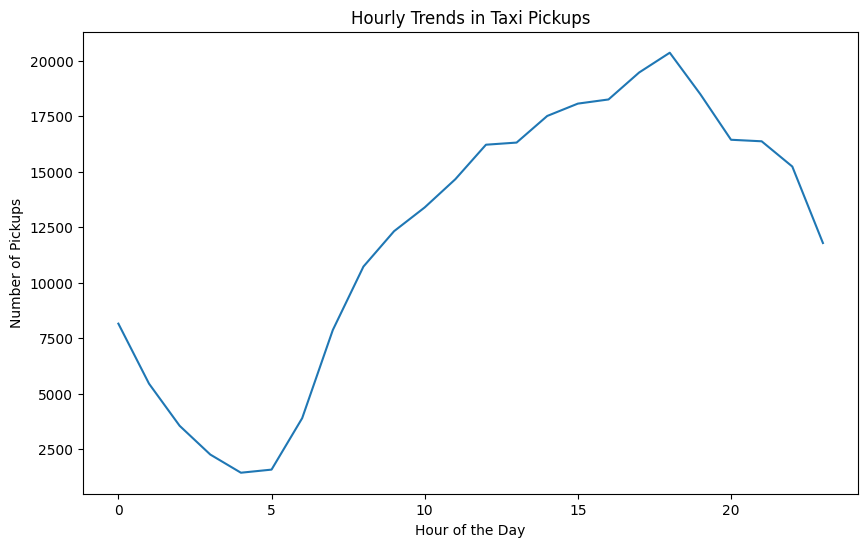

In [44]:
# Find and show the hourly trends in taxi pickups

# Convert 'tpep_pickup_datetime' to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

# Extract hour, day of the week, and month
df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour
df1['day_of_week'] = df1['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df1['month'] = df1['tpep_pickup_datetime'].dt.month

# Hourly trends
hourly_trends = df1.groupby('pickup_hour')['pickup_hour'].count()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_trends.index, y=hourly_trends.values)
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()

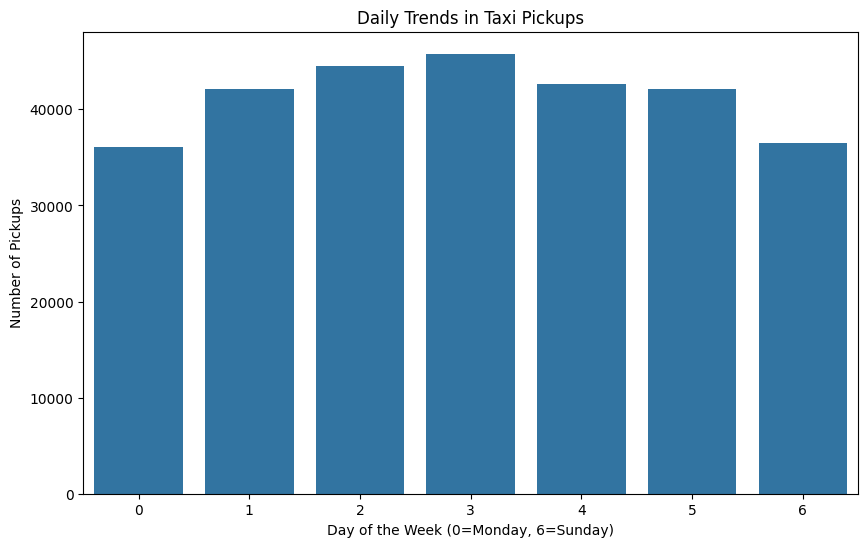

In [45]:
# Find and show the daily trends in taxi pickups (days of the week)
daily_trends = df1.groupby('day_of_week')['day_of_week'].count()
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_trends.index, y=daily_trends.values)
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Pickups')
plt.show()



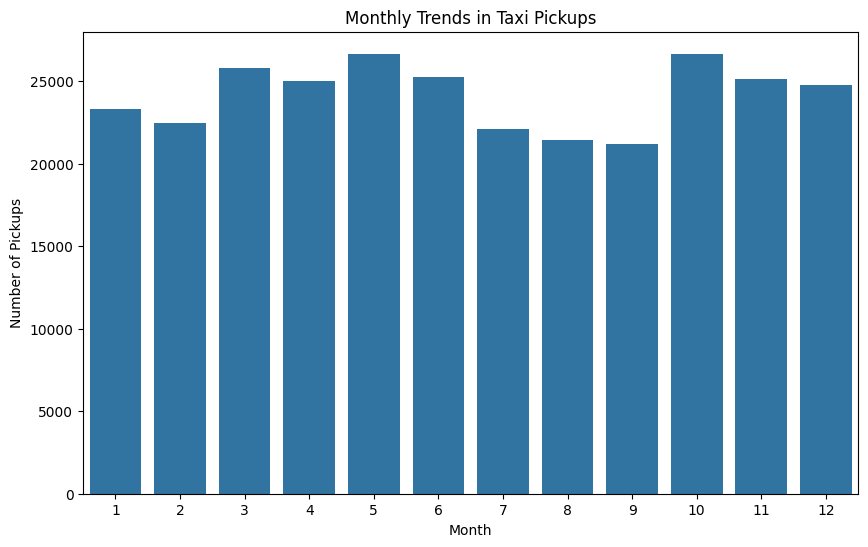

In [46]:
# Show the monthly trends in pickups
monthly_trends = df1.groupby('month')['month'].count()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_trends.index, y=monthly_trends.values)
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()


#Financial Analysis

Take a look at the financial parameters like fare_amount, tip_amount, total_amount, and also trip_distance. Do these contain zero/negative values?

In [47]:
# Analyse the above parameters


financial_columns = ['fare_amount', 'tip_amount', 'total_amount']
distance_column = 'trip_distance'

for col in financial_columns:
    zero_count = (df1[col] == 0).sum()
    negative_count = (df1[col] < 0).sum()
    print(f"Column '{col}':")
    print(f"  Zero values: {zero_count}")
    print(f"  Negative values: {negative_count}")

zero_distance_count = (df1[distance_column] == 0).sum()
negative_distance_count = (df1[distance_column] < 0).sum()
print(f"\nColumn '{distance_column}':")
print(f"  Zero values: {zero_distance_count}")
print(f"  Negative values: {negative_distance_count}")

Column 'fare_amount':
  Zero values: 81
  Negative values: 0
Column 'tip_amount':
  Zero values: 64890
  Negative values: 0
Column 'total_amount':
  Zero values: 39
  Negative values: 0

Column 'trip_distance':
  Zero values: 3670
  Negative values: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

##3.1.3 [2 marks]

Filter out the zero values from the above columns.

Note: The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [48]:
# Create a df with non zero entries for the selected parameters.

df_filtered = df1.copy()

# Specify columns to filter
columns_to_filter = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Filter out rows where any of the specified columns have zero values
df_filtered = df_filtered[df_filtered[columns_to_filter].gt(0).all(axis=1)]

# Display the filtered DataFrame
print(df_filtered.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-17 09:19:16   2023-12-17 09:34:55              1.0   
1         2  2023-01-09 14:07:12   2023-01-09 14:15:49              1.0   
2         2  2023-01-10 18:08:52   2023-01-10 18:21:36              1.0   
3         1  2023-04-01 00:22:22   2023-04-01 00:48:00              1.0   
6         2  2023-02-08 12:59:26   2023-02-08 13:25:55              3.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.58         1.0                  N           107           230   
1           1.28         1.0                  N           211           261   
2           2.17         1.0                  N            13            79   
3           4.90         1.0                  N           263            79   
6           3.36         1.0                  N           161           144   

   payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \

###3.1.4 [3 marks]

Analyse the monthly revenue (total_amount) trend

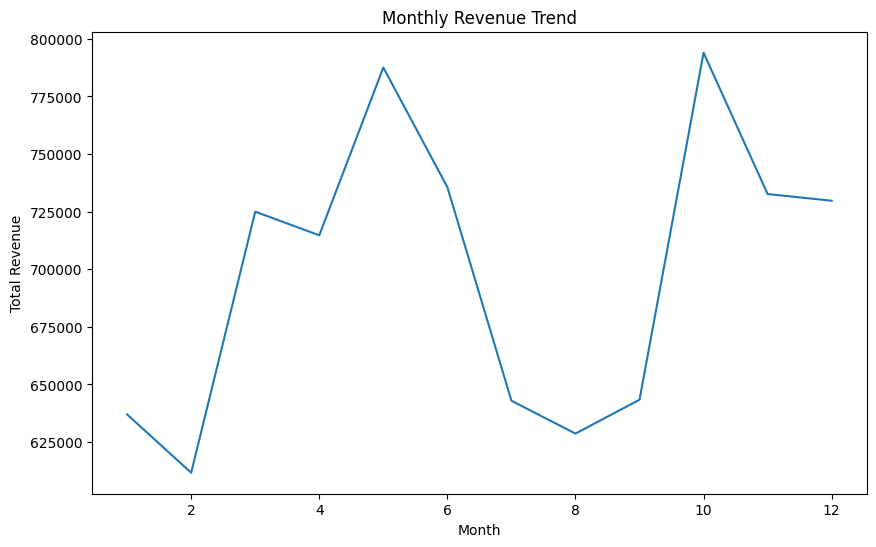

In [49]:
# Group data by month and analyse monthly revenue

monthly_revenue = df1.groupby('month')['total_amount'].sum()

# Plotting monthly revenue
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

In [50]:
monthly_avg_trip_distance = df1.groupby('month')['trip_distance'].mean()
monthly_avg_fare = df1.groupby('month')['fare_amount'].mean()
print(f'Monthly average trip distance: \n{monthly_avg_trip_distance}')
print(f'Monthly average fare: \n{monthly_avg_fare}')

Monthly average trip distance: 
month
1     3.373478
2     3.292040
3     3.378929
4     3.478034
5     3.555224
6     3.518711
7     3.577515
8     3.646274
9     3.544580
10    3.477473
11    3.350483
12    3.354344
Name: trip_distance, dtype: float64
Monthly average fare: 
month
1     18.547307
2     18.454492
3     19.099333
4     19.581602
5     20.246952
6     19.955035
7     20.035260
8     20.211551
9     20.923091
10    20.383676
11    19.899948
12    20.159172
Name: fare_amount, dtype: float64


#3.1.5 [3 marks]

Show the proportion of each quarter of the year in the revenue

quarter
1    23.544017
2    26.695783
3    22.844284
4    26.915916
Name: total_amount, dtype: float64


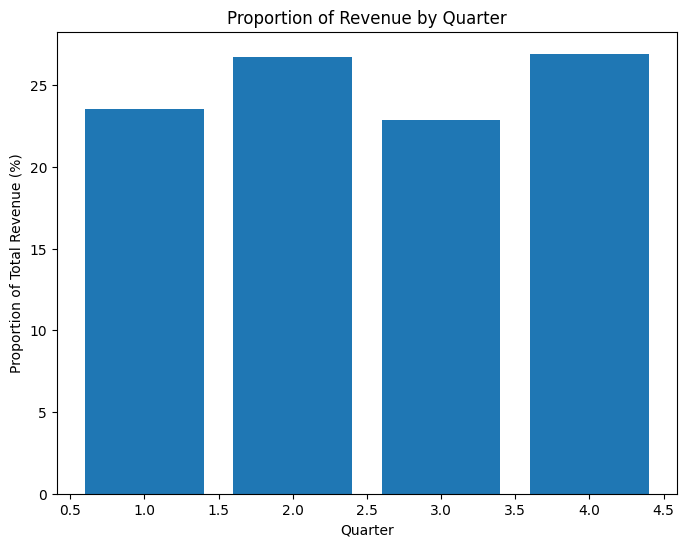

In [51]:
# Calculate proportion of each quarter

df1['quarter'] = df1['tpep_pickup_datetime'].dt.quarter

quarterly_revenue = df1.groupby('quarter')['total_amount'].sum()
total_revenue = df1['total_amount'].sum()
quarterly_proportions = quarterly_revenue / total_revenue * 100

print(quarterly_proportions)

# You can further visualize this using a bar plot or pie chart:
plt.figure(figsize=(8, 6))
plt.bar(quarterly_proportions.index, quarterly_proportions.values)
plt.xlabel("Quarter")
plt.ylabel("Proportion of Total Revenue (%)")
plt.title("Proportion of Revenue by Quarter")
plt.show()

#3.1.6 [3 marks]
Visualise the relationship between trip_distance and fare_amount. Also find the correlation value for these two.

Hint: You can leave out the trips with trip_distance = 0

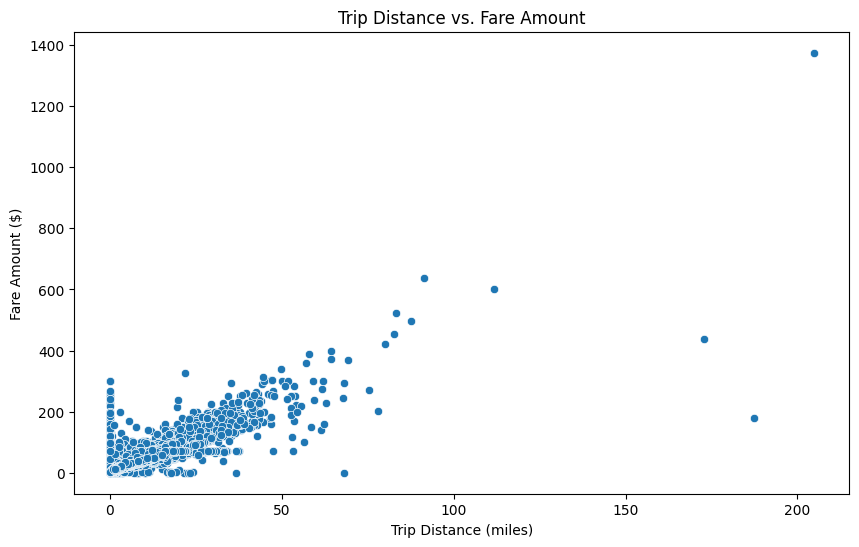

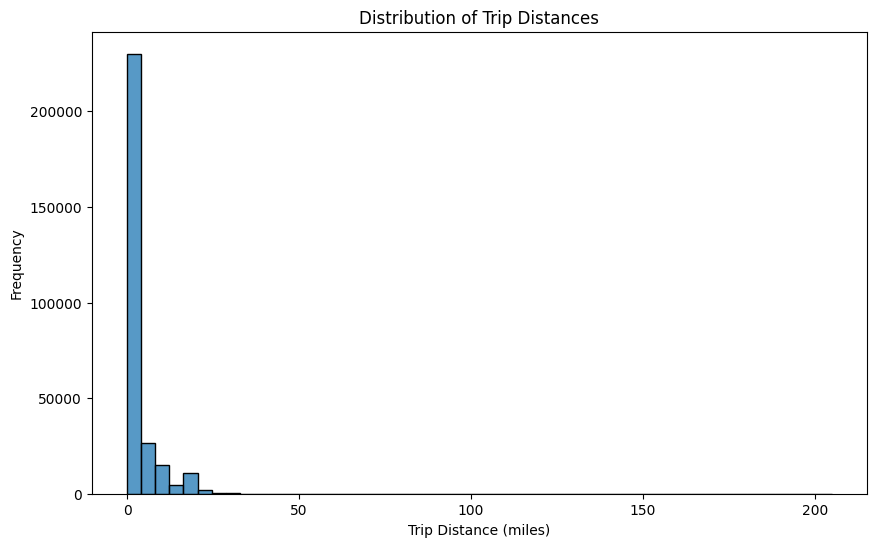

In [52]:
# Show how trip fare is affected by distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df1)
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Show the distribution of trip distances
plt.figure(figsize=(10, 6))
sns.histplot(df1['trip_distance'], bins=50)
plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.show()

#3.1.7 [5 marks]
Find and visualise the correlation between:

fare_amount and trip duration (pickup time to dropoff time)
fare_amount and passenger_count
tip_amount and trip_distance

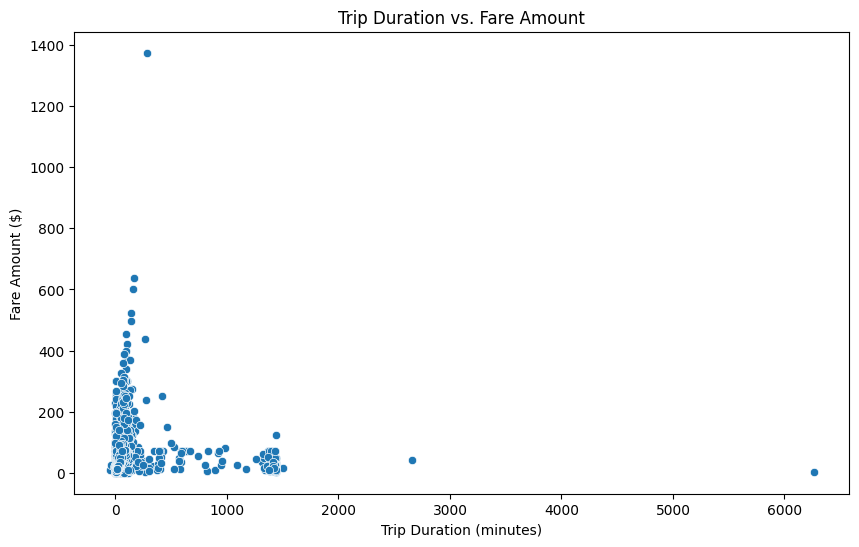

Correlation between fare_amount and trip_duration: 0.26474606226021496


In [53]:
# Show relationship between fare and trip duration

# Calculate trip duration
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])
df1['trip_duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 60

# 1. fare_amount and trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df1)
plt.title('Trip Duration vs. Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()

correlation1 = df1['fare_amount'].corr(df1['trip_duration'])
print(f"Correlation between fare_amount and trip_duration: {correlation1}")

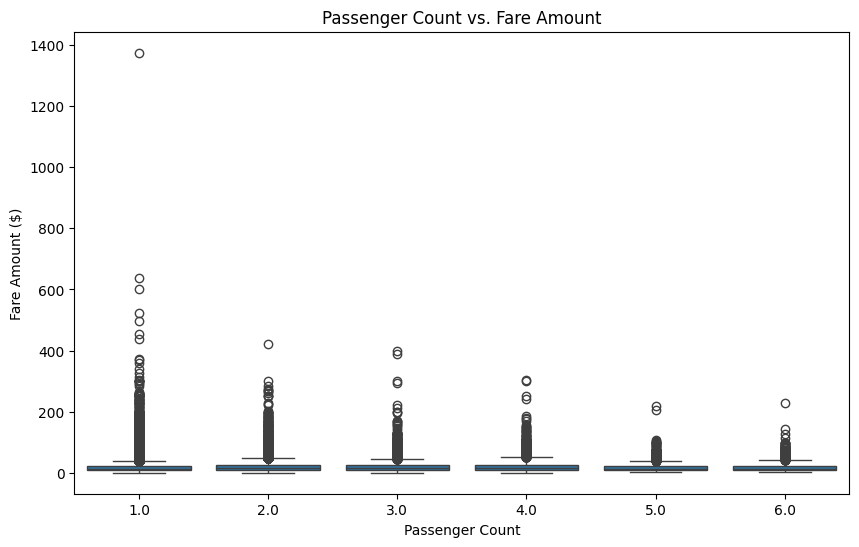

Correlation between fare_amount and passenger_count: 0.04296845011508681


In [54]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df1)
plt.title('Passenger Count vs. Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

correlation2 = df1['fare_amount'].corr(df1['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {correlation2}")

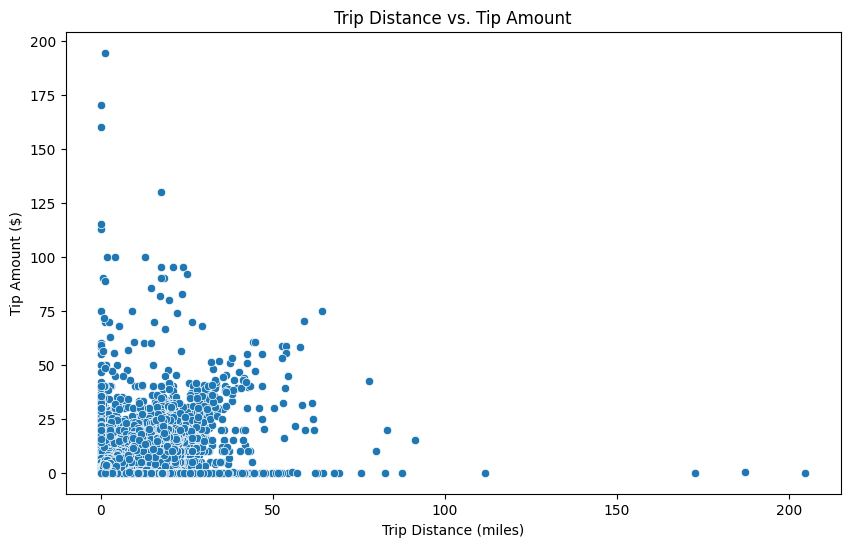

Correlation between tip_amount and trip_distance: 0.56459210792187


In [55]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df1)
plt.title('Trip Distance vs. Tip Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

correlation3 = df1['tip_amount'].corr(df1['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {correlation3}")

#3.1.8 [3 marks]
Analyse the distribution of different payment types (payment_type)

payment_type
1    236018
2     50201
4      2134
3      1430
Name: count, dtype: int64


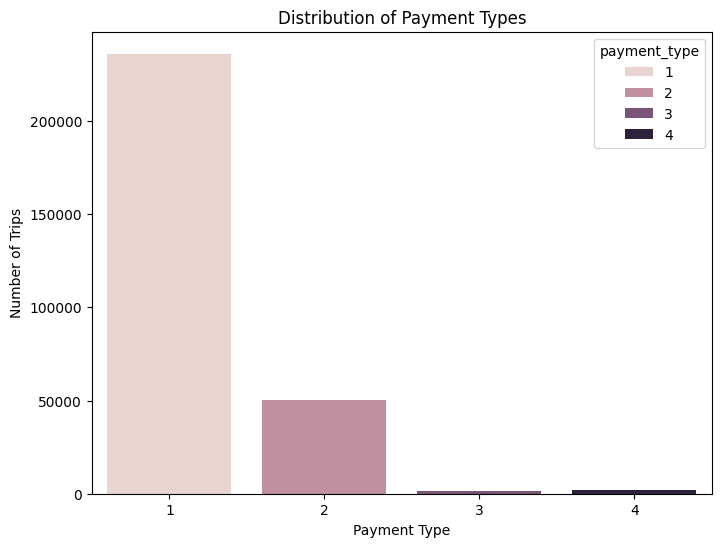

In [56]:
# Analyse the distribution of different payment types (payment_type).
payment_type_counts = df1['payment_type'].value_counts()
print(payment_type_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data=df1,hue='payment_type')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute

Geographical Analysis
For this, you have to use the taxi_zones.shp file from the taxi_zones folder.

There would be multiple files inside the folder (such as .shx, .sbx, .sbn etc). You do not need to import/read any of the files other than the shapefile, taxi_zones.shp.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:

Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx
You only need to read the taxi_zones.shp file. The shp file will utilise the other files by itself.

We will use the GeoPandas library for geopgraphical analysis

import geopandas as gpd
More about geopandas and shapefiles: About

Reading the shapefile is very similar to Pandas. Use gpd.read_file() function to load the data (taxi_zones.shp) as a GeoDataFrame. Documentation: Reading and Writing Files

In [57]:
!pip install geopandas

#3.1.9 [2 marks]

Load the shapefile and display it.

In [58]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/NYC_Taxi/Datasets_and_Dictionary/taxi_zones/taxi_zones.shp')


zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: OBJECTID,Shape_Leng, Shape_Area, zone, LocationID, borough, geometry.


Now, the locationID here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the plot() method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

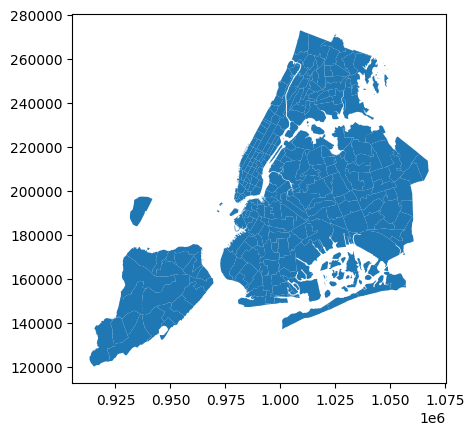

In [59]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.

###3.1.10 [3 marks]
Merge the zones data into trip data using the locationID and PULocationID columns.

In [60]:
# Merge zones and trip records using locationID and PULocationID
df1 = pd.merge(df1, zones, left_on='PULocationID', right_on='LocationID', how='left')
df1.rename(columns={
    'zone': 'PUzone',
    'borough': 'PUborough'
}, inplace=True)
df1 = df1.drop('LocationID', axis=1)
df1 = pd.merge(df1, zones, left_on='DOLocationID', right_on='LocationID', how='left')
df1.rename(columns={
    'zone': 'DOzone',
    'borough': 'DOborough'
}, inplace=True)

df1 = df1.drop('LocationID', axis=1)
df1.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Shape_Area_x,PUzone,PUborough,geometry_x,OBJECTID_y,Shape_Leng_y,Shape_Area_y,DOzone,DOborough,geometry_y
0,2,2023-12-17 09:19:16,2023-12-17 09:34:55,1.0,2.58,1.0,N,107,230,1,...,0.000075,Gramercy,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20...",230.0,0.031028,0.000056,Times Sq/Theatre District,Manhattan,"POLYGON ((988786.877 214532.094, 988650.277 21..."
1,2,2023-01-09 14:07:12,2023-01-09 14:15:49,1.0,1.28,1.0,N,211,261,1,...,0.000040,SoHo,Manhattan,"POLYGON ((983827.65 201526.658, 983727.737 201...",261.0,0.027120,0.000034,World Trade Center,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
2,2,2023-01-10 18:08:52,2023-01-10 18:21:36,1.0,2.17,1.0,N,13,79,1,...,0.000149,Battery Park City,Manhattan,"POLYGON ((980801.31 201248.869, 980697.386 200...",79.0,0.042625,0.000108,East Village,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
3,1,2023-04-01 00:22:22,2023-04-01 00:48:00,1.0,4.90,1.0,N,263,79,1,...,0.000066,Yorkville West,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",79.0,0.042625,0.000108,East Village,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
4,2,2023-01-07 22:26:46,2023-01-07 22:36:29,1.0,4.97,1.0,N,132,130,2,...,0.002038,JFK Airport,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",130.0,0.142028,0.000468,Jamaica,Queens,"POLYGON ((1048117.059 198683.432, 1047994.802 ..."


###3.1.11 [3 marks]
Group data by location IDs to find the total number of trips per location ID

In [61]:
  # Group data by location and calculate the number of trips
location_trip_counts = df1.groupby('PULocationID')['PULocationID'].count()


location_trip_counts


,PULocationID
PULocationID,
1,30
2,1
3,5
4,326
5,1
...,...
261,1618
262,3799
263,5406


3.1.12 [2 marks]
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [62]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(location_trip_counts.rename('trip_count'), left_on='LocationID', right_index=True)
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",30
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",1
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",5
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",326
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",1



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the zones.plot() method for this. Plot Method GPD

But first, you need to define the figure and axis for the plot.

fig, ax = plt.subplots(1, 1, figsize = (12, 10))

This function creates a figure (fig) and a single subplot (ax)

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the zones.plot() method:

column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
To display the plot, use plt.show().

###3.1.13 [3 marks]
Plot a color-coded map showing zone-wise trips

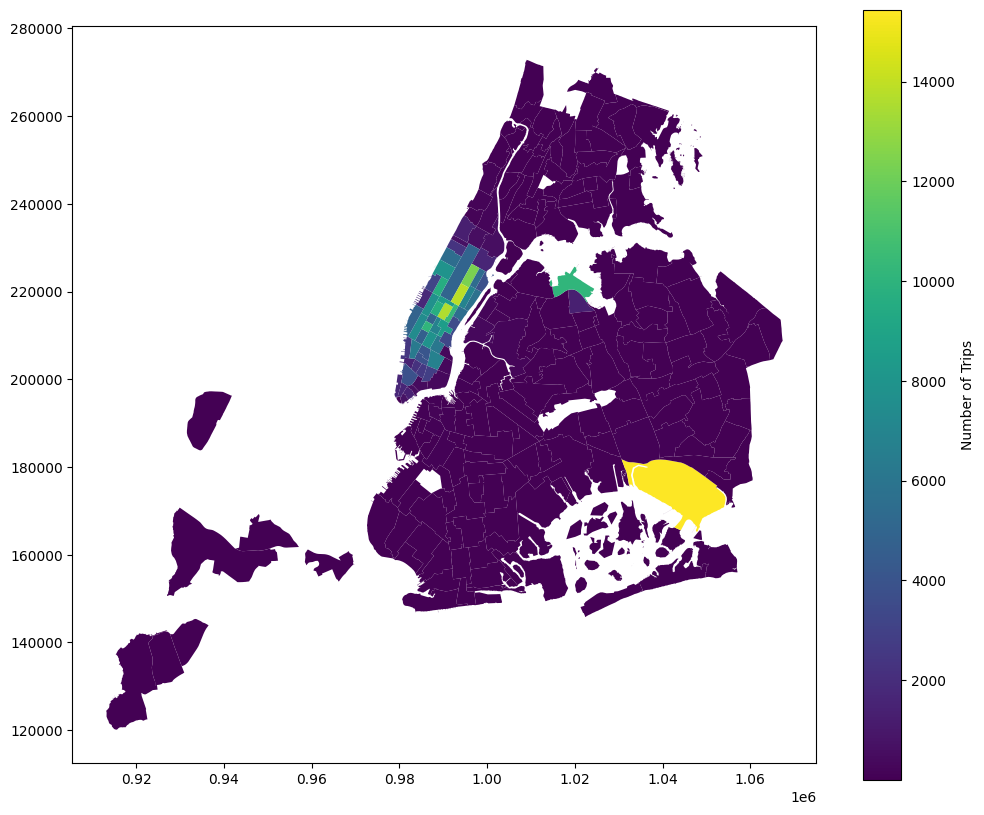

In [63]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(column='trip_count', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "vertical"})
plt.show()

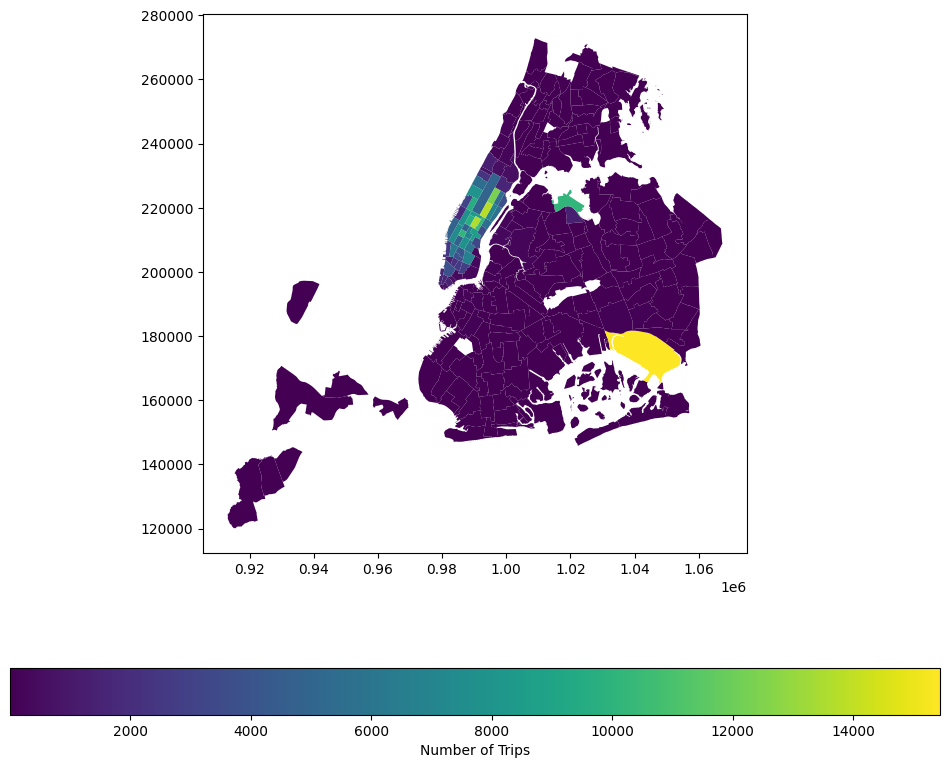

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",15441
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",13818
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",13575
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",12319
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",10369


In [64]:
# can you try displaying the zones DF sorted by the number of trips?
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones.plot(column='trip_count',
            ax=ax,
            legend=True,
            legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
plt.show()

# Display the zones DataFrame sorted by the number of trips
zones_sorted = zones.sort_values(by='trip_count', ascending=False)
zones_sorted.head()


Here we have completed the temporal, financial and geographical analysis on the trip records.

Compile your findings from general analysis below:

You can consider the following points:

Busiest hours, days and months

Trends in revenue collected

Trends in quarterly revenue

How fare depends on trip distance, trip duration and passenger counts

How tip amount depends on trip distance

Busiest zones

##3.2 Detailed EDA: Insights and Strategies
[50 marks]

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

Operational Efficiency
Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

##3.2.1 [3 marks]
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route X for hour Y = (distance of the route X / average trip duration for hour Y)

In [65]:
# Find routes which have the slowest speeds at different times of the day


# Calculate average trip duration for each route and hour
df1['route'] = df1['PULocationID'].astype(str) + '_' + df1['DOLocationID'].astype(str)
route_hourly_avg_duration = df1.groupby(['route', 'pickup_hour'])['trip_duration'].mean().reset_index()

# Merge back into the original DataFrame
df1 = pd.merge(df1, route_hourly_avg_duration, on=['route', 'pickup_hour'], suffixes=('', '_avg'))

# Calculate speed for each trip
df1['speed'] = df1['trip_distance'] / df1['trip_duration_avg']

# Find the slowest routes at different times
slowest_routes = df1.loc[df1.groupby('pickup_hour')['speed'].idxmin()]

# Display the results
print(slowest_routes[['pickup_hour', 'route', 'speed']])

# Further analysis and visualization
# You can create visualizations (e.g., line plots, heatmaps) to better understand the slowest routes over time and across different locations.

        pickup_hour    route     speed
755               0  264_264  0.000000
220471            1  238_233 -0.124740
2331              2  141_141  0.000000
6153              3  141_141  0.000000
20804             4  174_174  0.000000
2557              5  158_158  0.000000
4013              6  158_158  0.000000
9659              7  132_132  0.000000
2418              8  233_233  0.000000
1481              9  141_141  0.000000
1602             10  132_223  0.000000
116764           11   213_32 -0.225235
1587             12  161_100  0.000000
1606             13  145_145  0.000000
372              14  132_197  0.000000
832              15   48_230  0.000000
947              16  132_132  0.000000
331              17  145_145  0.000000
1840             18  264_264  0.000000
944              19  142_142  0.000000
589              20  132_132  0.000000
17               21  239_239  0.000000
3177             22  107_249  0.000000
255              23  162_162  0.000000


##3.2.2 [3 marks]
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

The busiest hour is 18 with 20361 trips.


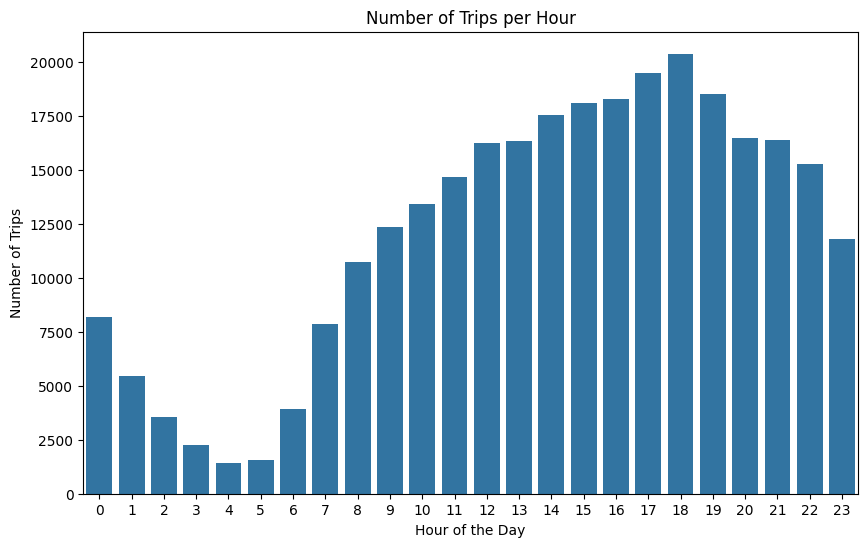

In [66]:
# Visualise the number of trips per hour and find the busiest hour

hourly_trips = df1.groupby('pickup_hour')['pickup_hour'].count()
busiest_hour = hourly_trips.idxmax()
busiest_hour_trips = hourly_trips.max()

print(f"The busiest hour is {busiest_hour} with {busiest_hour_trips} trips.")

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values)
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

##3.2.3 [2 mark]
Find the actual number of trips in the five busiest hours

In [67]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1

# Assuming 'hourly_trips' is already calculated as in the previous code
actual_hourly_trips = hourly_trips / sample_fraction

# Find the five busiest hours
top_5_busiest_hours = actual_hourly_trips.nlargest(5)

print(f"Actual number of trips in the five busiest hours:\n{top_5_busiest_hours}")

Actual number of trips in the five busiest hours:
pickup_hour
18    203610.0
17    194730.0
19    184950.0
16    182560.0
15    180690.0
Name: pickup_hour, dtype: float64


##3.2.4 [3 marks]
Compare hourly traffic pattern on weekdays. Also compare for weekend.

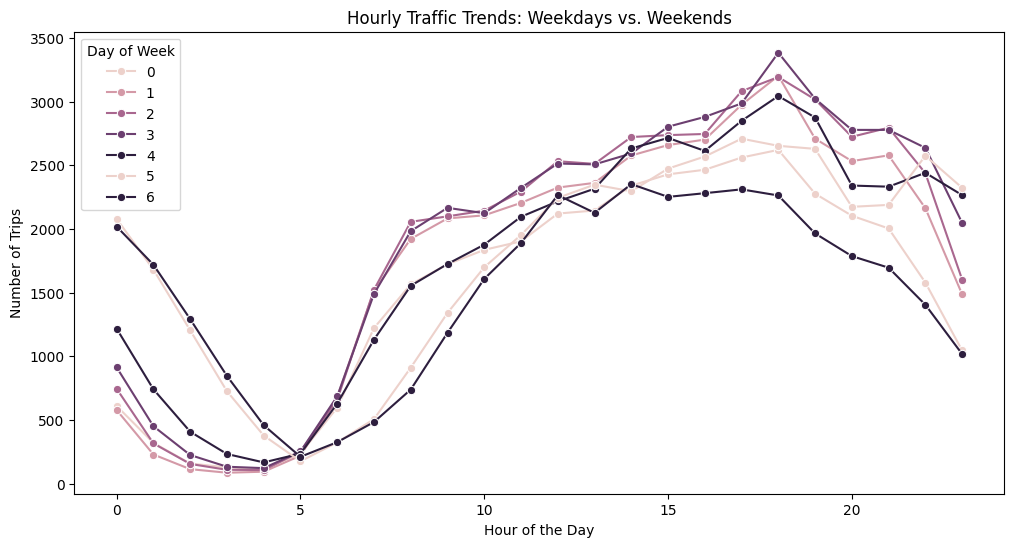

In [68]:
# Compare traffic trends for the week days and weekends
# Group data by day of the week and hour, then count trips
weekday_traffic = df1[df1['day_of_week'] < 5].groupby(['day_of_week', 'pickup_hour'])['pickup_hour'].count().reset_index(name='trip_count')
weekend_traffic = df1[df1['day_of_week'] >= 5].groupby(['day_of_week', 'pickup_hour'])['pickup_hour'].count().reset_index(name='trip_count')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='trip_count', hue='day_of_week', data=weekday_traffic, marker='o')
sns.lineplot(x='pickup_hour', y='trip_count', hue='day_of_week', data=weekend_traffic, marker='o')
plt.title('Hourly Traffic Trends: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='Day of Week')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

##3.2.5 [3 marks]
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [69]:
# Find top 10 pickup and dropoff zones

# Top 10 Pickup Zones
top_10_pickup_zones = df1['PULocationID'].value_counts().nlargest(10).index
print("Top 10 Pickup Zones:")
print(top_10_pickup_zones)

# Top 10 Dropoff Zones
top_10_dropoff_zones = df1['DOLocationID'].value_counts().nlargest(10).index
print("\nTop 10 Dropoff Zones:")
print(top_10_dropoff_zones)

Top 10 Pickup Zones:
Index([132, 237, 161, 236, 162, 138, 186, 230, 142, 170], dtype='int64', name='PULocationID')

Top 10 Dropoff Zones:
Index([236, 237, 161, 230, 170, 162, 239, 142, 141, 163], dtype='int64', name='DOLocationID')


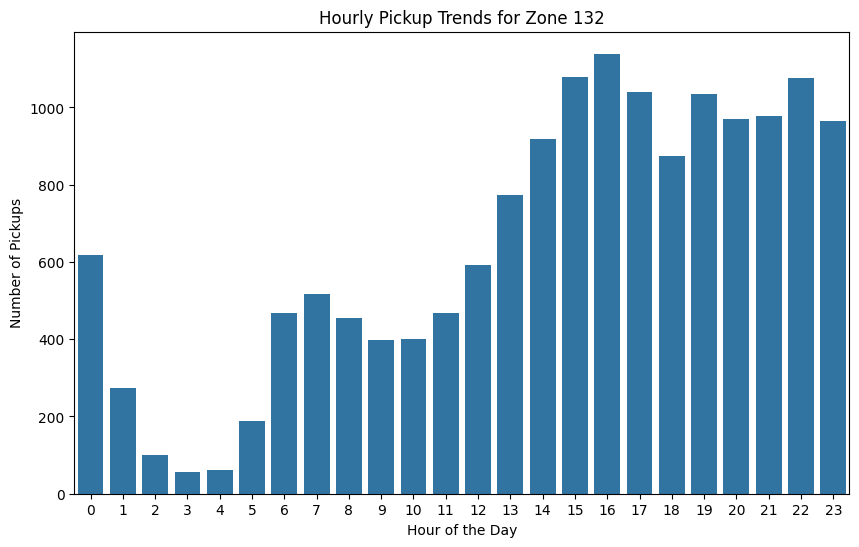

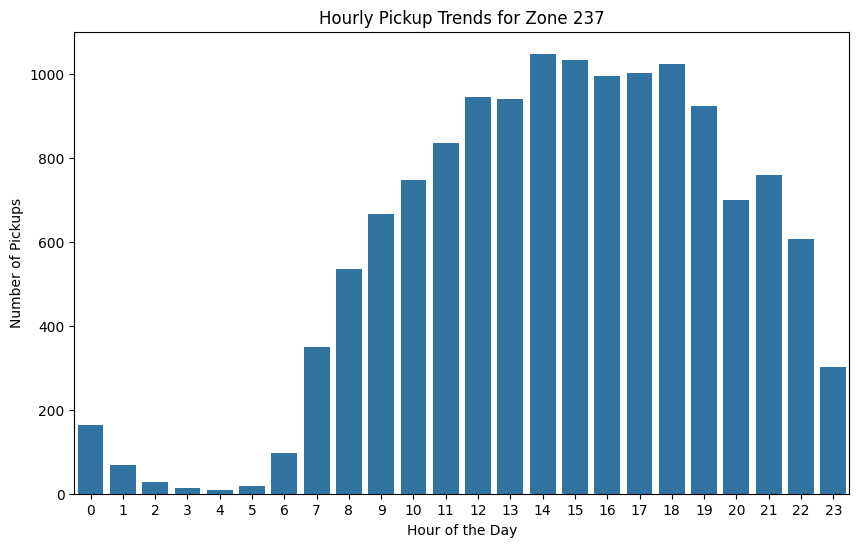

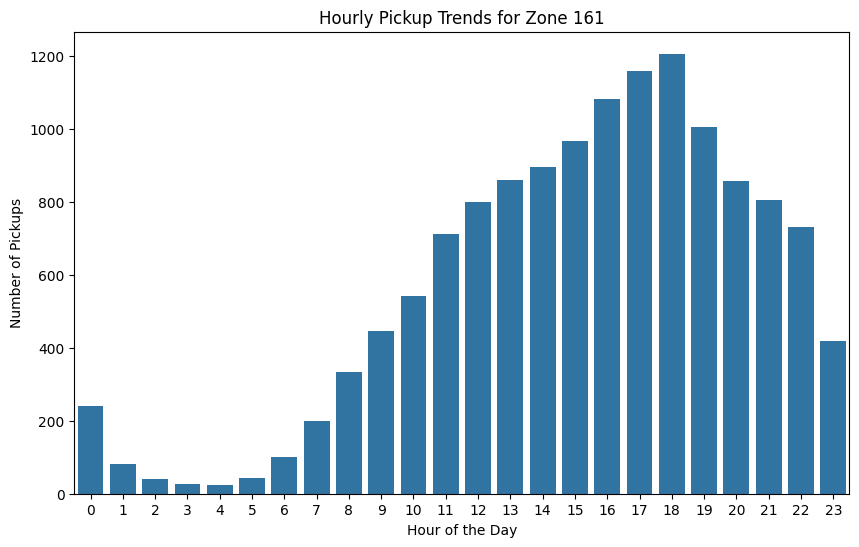

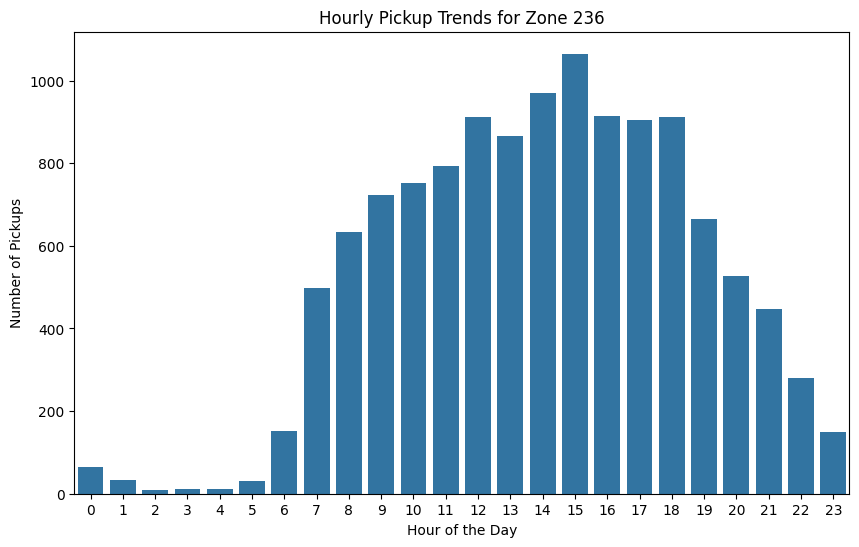

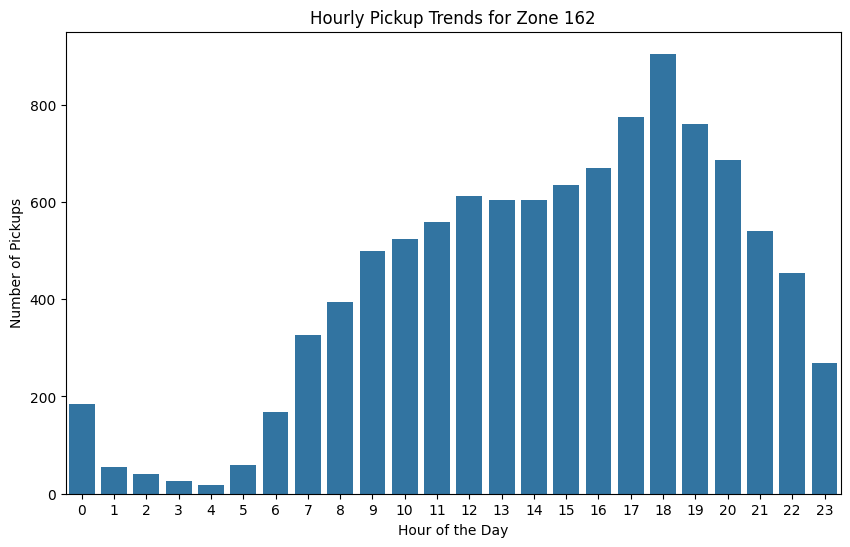

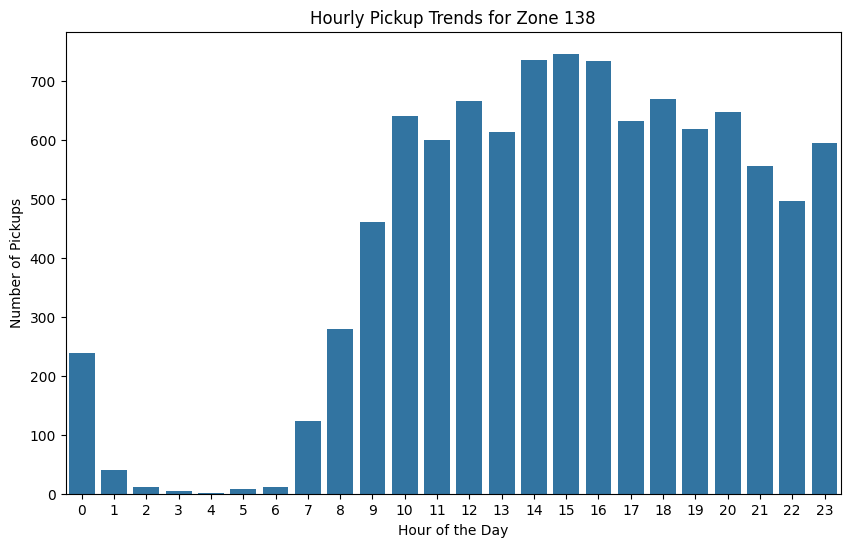

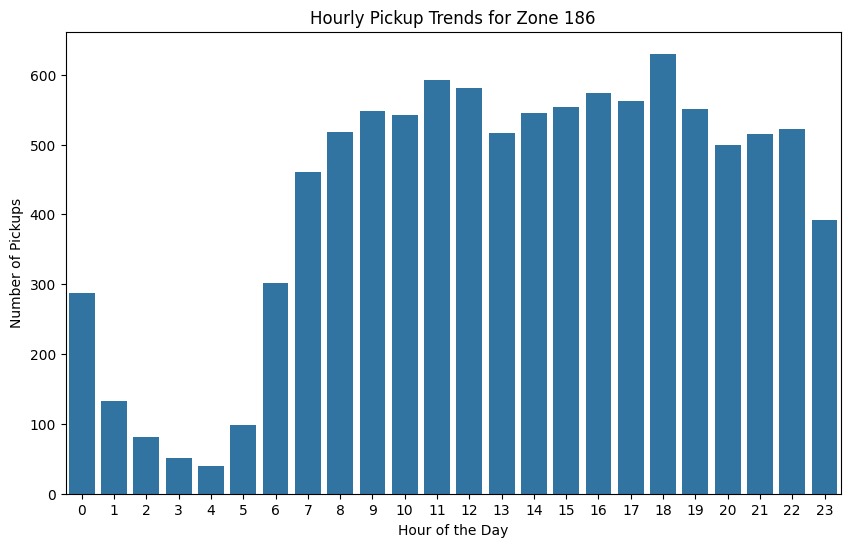

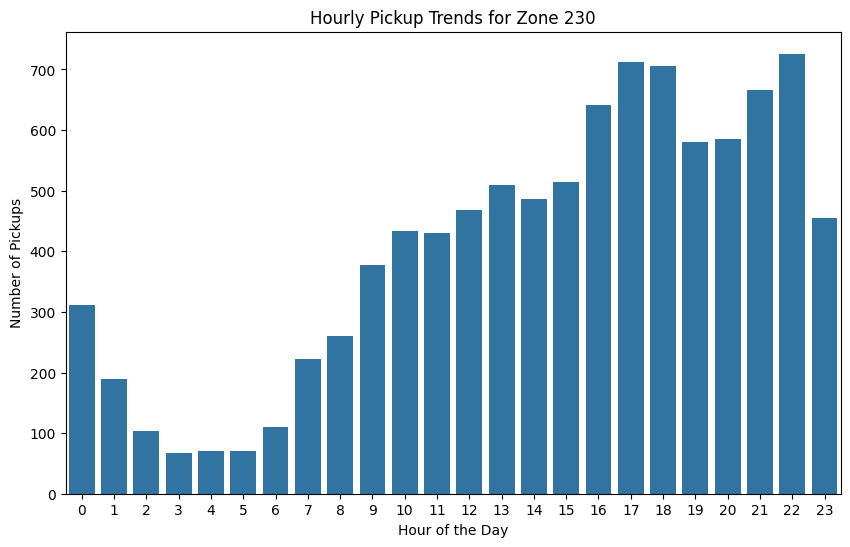

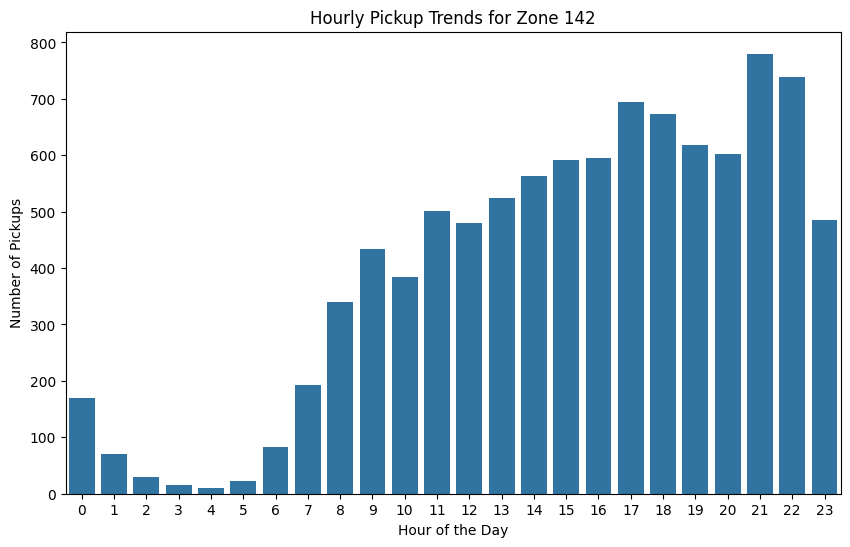

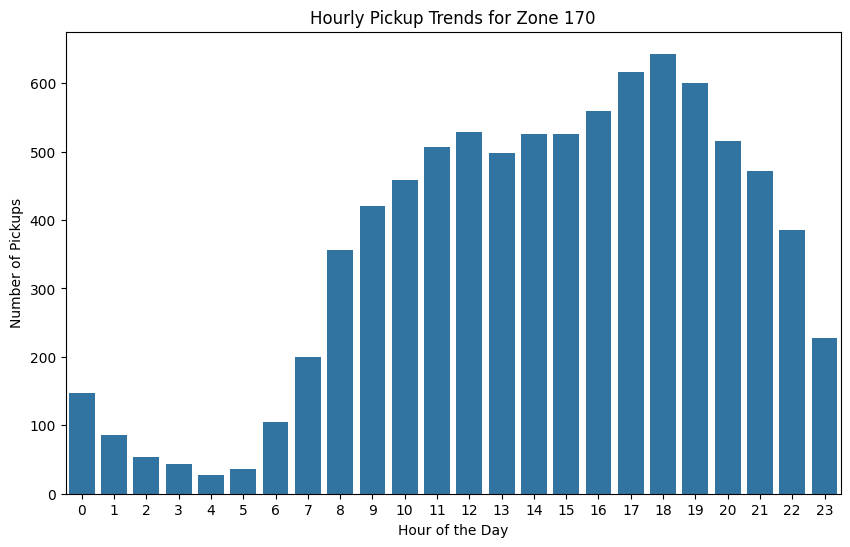

In [70]:
#  Visualize pickup trends for top 10 zones (example for one zone)


for zone in top_10_pickup_zones:
  zone_data = df1[df1['PULocationID'] == zone]
  hourly_pickups = zone_data.groupby('pickup_hour')['pickup_hour'].count()

  plt.figure(figsize=(10, 6))
  sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values)
  plt.title(f'Hourly Pickup Trends for Zone {zone}')
  plt.xlabel('Hour of the Day')
  plt.ylabel('Number of Pickups')
  plt.show()

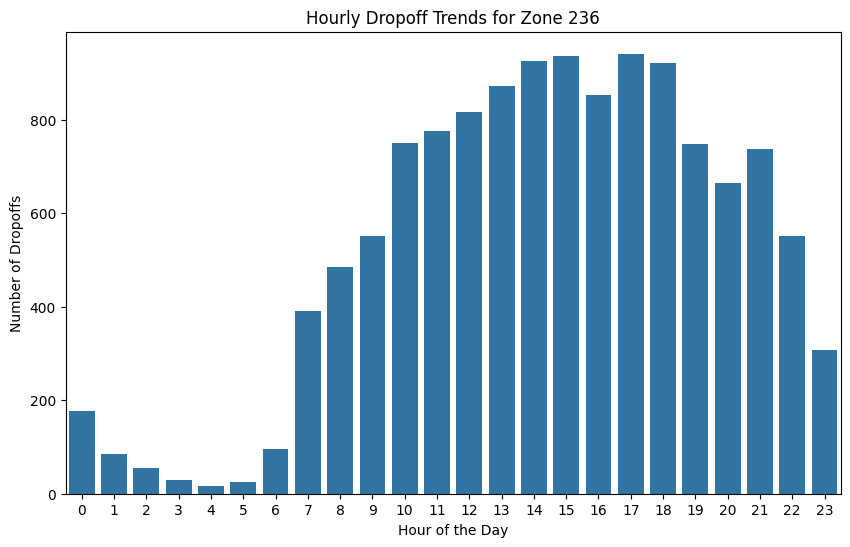

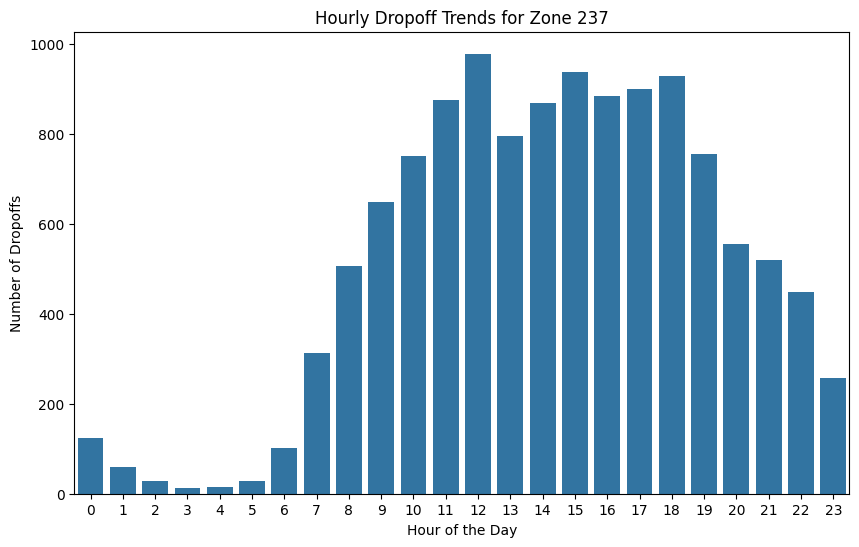

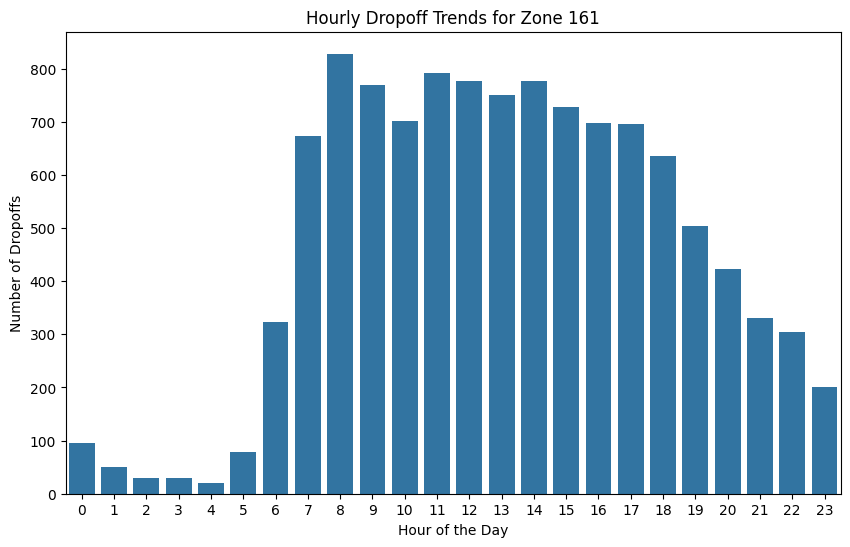

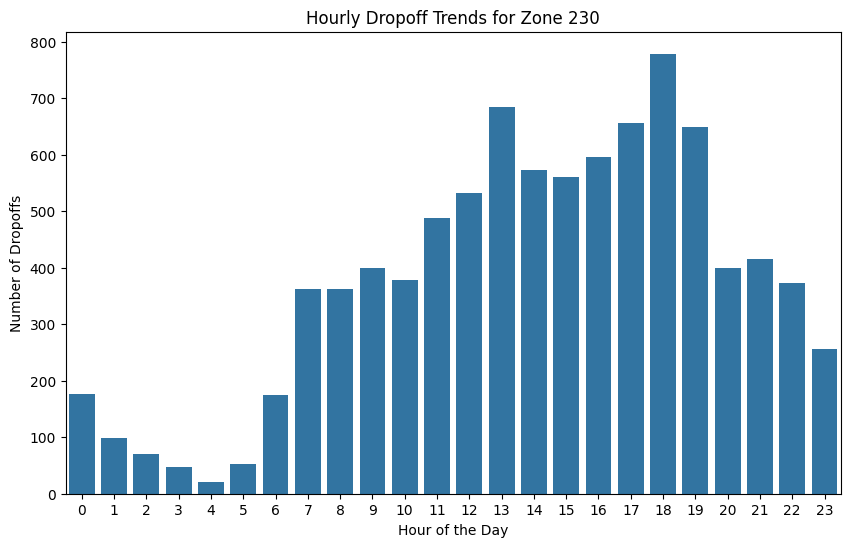

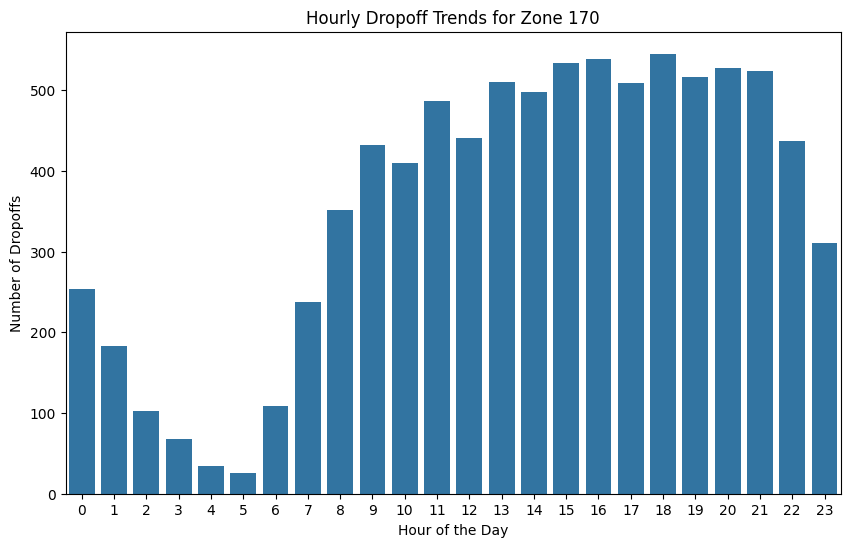

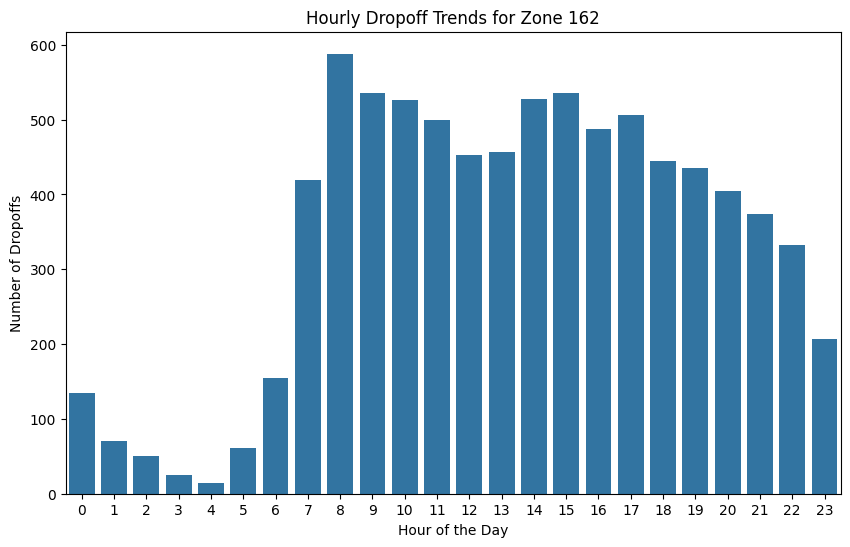

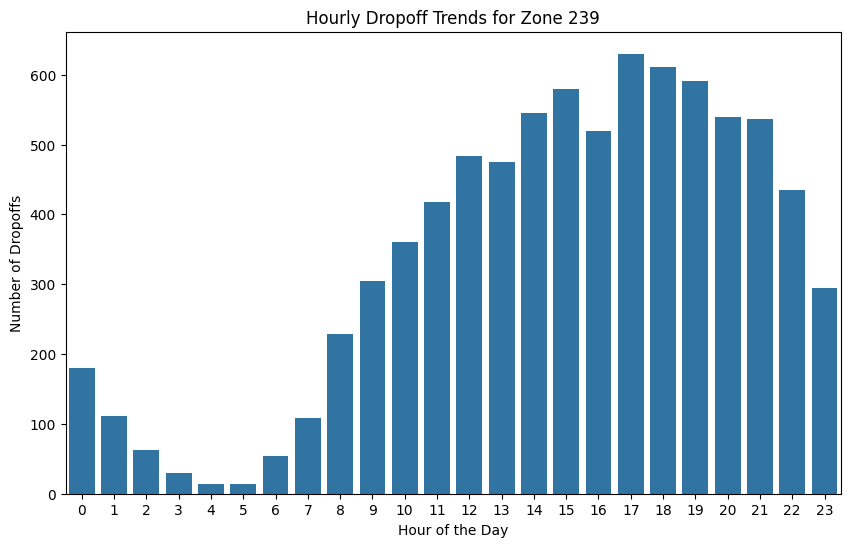

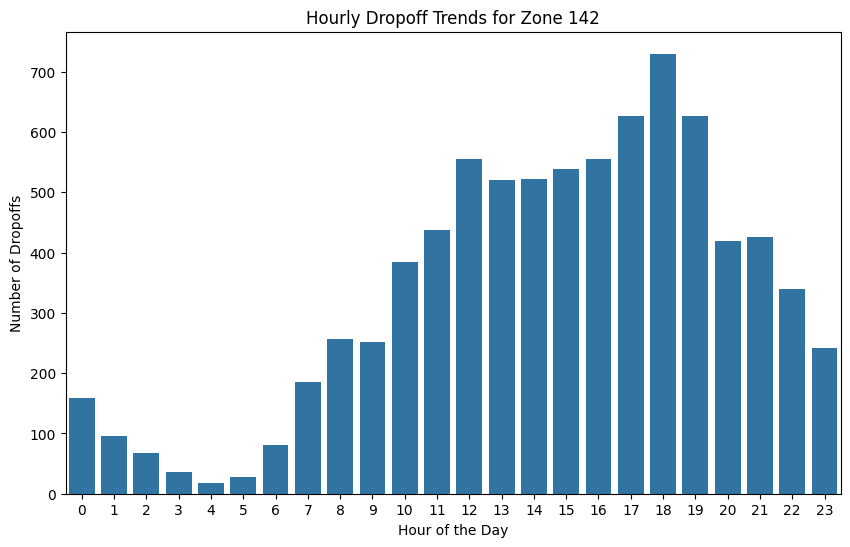

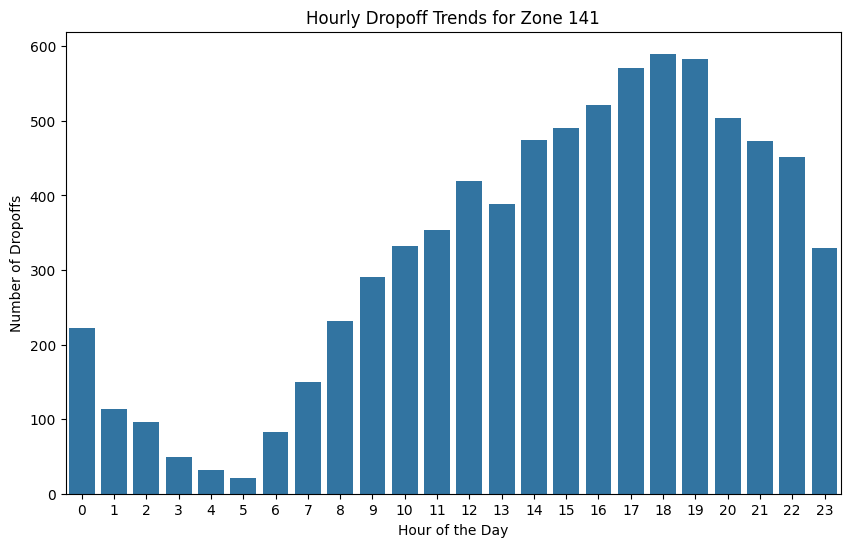

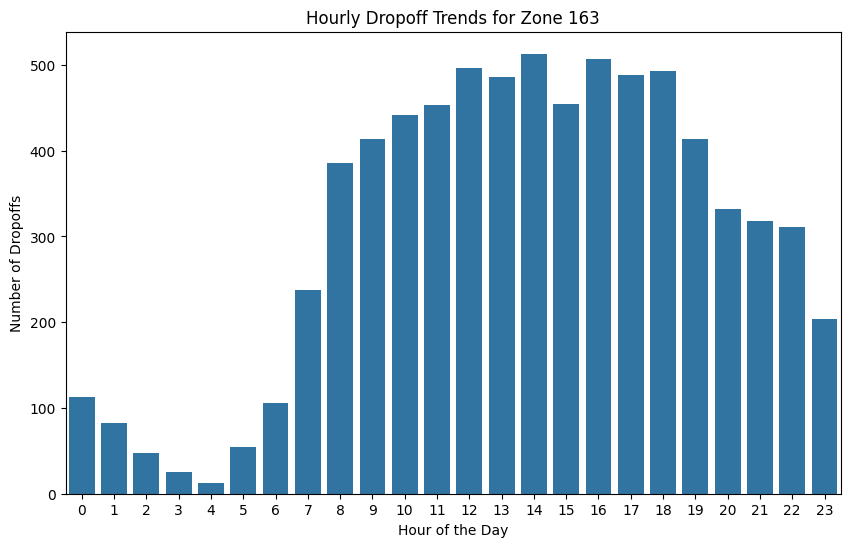

In [71]:
# Visualize dropoff trends for top 10 zones (example for one zone)
for zone in top_10_dropoff_zones:
  zone_data = df1[df1['DOLocationID'] == zone]
  hourly_dropoffs = zone_data.groupby('pickup_hour')['pickup_hour'].count()

  plt.figure(figsize=(10, 6))
  sns.barplot(x=hourly_dropoffs.index, y=hourly_dropoffs.values)
  plt.title(f'Hourly Dropoff Trends for Zone {zone}')
  plt.xlabel('Hour of the Day')
  plt.ylabel('Number of Dropoffs')
  plt.show()

##3.2.6 [3 marks]
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [72]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Calculate the pickup/dropoff ratio for each zone
pickup_counts = df1.groupby('PULocationID')['PULocationID'].count()
dropoff_counts = df1.groupby('DOLocationID')['DOLocationID'].count()

ratio_df = pd.DataFrame({'pickup_count': pickup_counts, 'dropoff_count': dropoff_counts})
ratio_df['ratio'] = ratio_df['pickup_count'] / ratio_df['dropoff_count']

# Find the top 10 and bottom 10 ratios
top_10_ratios = ratio_df.sort_values(by='ratio', ascending=False).head(10)
bottom_10_ratios = ratio_df.sort_values(by='ratio', ascending=True).head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios)

print("\nBottom 10 Pickup/Dropoff Ratios:")
bottom_10_ratios

Top 10 Pickup/Dropoff Ratios:
     pickup_count  dropoff_count     ratio
70         1330.0          153.0  8.692810
132       15441.0         3340.0  4.623054
138       10127.0         3505.0  2.889301
186       10096.0         6311.0  1.599746
114        3906.0         2786.0  1.402010
43         4931.0         3571.0  1.380846
249        6329.0         4784.0  1.322952
162       10369.0         8245.0  1.257611
161       13575.0        11210.0  1.210972
100        4840.0         4019.0  1.204280

Bottom 10 Pickup/Dropoff Ratios:


,pickup_count,dropoff_count,ratio
257,2.0,123.0,0.016260
15,1.0,34.0,0.029412
173,2.0,58.0,0.034483
1,30.0,830.0,0.036145
194,2.0,52.0,0.038462
190,2.0,52.0,0.038462
128,1.0,26.0,0.038462
198,6.0,152.0,0.039474
37,13.0,311.0,0.041801
112,34.0,615.0,0.055285


##3.2.7 [3 marks]
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [73]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours_df = df1[(df1['pickup_hour'] >= 23) | (df1['pickup_hour'] <= 5)]

# Top 10 Pickup Zones during night hours
top_10_night_pickup_zones = night_hours_df['PULocationID'].value_counts().nlargest(10)
print("Top 10 Pickup Zones (Night Hours):")
print(top_10_night_pickup_zones)

# Top 10 Dropoff Zones during night hours
top_10_night_dropoff_zones = night_hours_df['DOLocationID'].value_counts().nlargest(10)
print("\nTop 10 Dropoff Zones (Night Hours):")
top_10_night_dropoff_zones

Top 10 Pickup Zones (Night Hours):
PULocationID
79     2432
132    2263
249    1989
48     1690
148    1434
114    1416
230    1268
186    1083
164     987
68      953
Name: count, dtype: int64

Top 10 Dropoff Zones (Night Hours):


,count
DOLocationID,
79,1307
48,1095
170,979
68,917
141,862
107,855
263,811
249,782
230,723


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

##3.2.8 [2 marks]
Find the revenue share for nighttime and daytime hours.

In [74]:
# Filter for night hours (11 PM to 5 AM)
night_hours_df = df1[(df1['pickup_hour'] >= 23) | (df1['pickup_hour'] <= 5)]

# Calculate the total revenue for night hours
night_revenue = night_hours_df['total_amount'].sum()

# Calculate the total revenue for all hours
total_revenue = df1['total_amount'].sum()

# Calculate the revenue share for night hours
night_revenue_share = (night_revenue / total_revenue) * 100

# Calculate the revenue share for daytime hours
day_revenue_share = 100 - night_revenue_share

print(f"Nighttime Revenue Share: {night_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {day_revenue_share:.2f}%")

Nighttime Revenue Share: 12.07%
Daytime Revenue Share: 87.93%


Pricing Strategy
##3.2.9 [2 marks]
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [75]:
# Analyse the fare per mile per passenger for different passenger counts
df1['fare_per_mile'] = df1['fare_amount'] / df1['trip_distance']

# Replace infinite values with NaN
df1['fare_per_mile'] = df1['fare_per_mile'].replace([np.inf, -np.inf], np.nan)

# Group by passenger count and calculate the average fare per mile per passenger
fare_per_mile_per_passenger = df1.groupby('passenger_count')['fare_per_mile'].mean() / df1.groupby('passenger_count')['passenger_count'].mean()

# Print the results
print(fare_per_mile_per_passenger)


passenger_count
1.0    10.710901
2.0     6.051902
3.0     4.265953
4.0     3.149503
5.0     1.818632
6.0     1.326007
dtype: float64


##3.2.10 [3 marks]
Find the average fare per mile by hours of the day and by days of the week

In [76]:
# Compare the average fare per mile for different days and for different times of the day
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

# Extract day of the week and hour of the day
df1['day_of_week'] = df1['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df1['hour_of_day'] = df1['tpep_pickup_datetime'].dt.hour

# Calculate fare per mile
df1['fare_per_mile'] = df1['fare_amount'] / df1['trip_distance']

# Remove infinity values
df1 = df1.replace([np.inf, -np.inf], np.nan).dropna(subset=['fare_per_mile'])

# Group data and calculate average fare per mile
average_fare_per_mile = df1.groupby(['day_of_week', 'hour_of_day'])['fare_per_mile'].mean().reset_index()

# Display results
average_fare_per_mile

,day_of_week,hour_of_day,fare_per_mile
0,0,0,7.323010
1,0,1,5.806174
2,0,2,6.687502
3,0,3,38.035436
4,0,4,5.847711
...,...,...,...
163,6,19,15.432234
164,6,20,11.687481
165,6,21,11.953736
166,6,22,28.424899


##3.2.11 [3 marks]
Analyse the average fare per mile for the different vendors for different hours of the day

In [77]:
# Compare fare per mile for different vendors
df1['fare_per_mile'] = df1['fare_amount'] / df1['trip_distance']

# Replace infinite values with NaN
df1['fare_per_mile'] = df1['fare_per_mile'].replace([np.inf, -np.inf], np.nan)

# Group by vendor and hour of the day, then calculate the average fare per mile
average_fare_per_mile_by_vendor_hour = df1.groupby(['VendorID', 'hour_of_day'])['fare_per_mile'].mean().reset_index()

# Display the results
average_fare_per_mile_by_vendor_hour


,VendorID,hour_of_day,fare_per_mile
0,1,0,6.570176
1,1,1,6.669972
2,1,2,6.547550
3,1,3,6.723573
4,1,4,7.296318
5,1,5,8.530127
6,1,6,6.438612
7,1,7,7.176472
8,1,8,7.804420
9,1,9,8.364739


##3.2.12 [5 marks]

Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.

In [78]:
# Defining distance tiers

distance_tiers = pd.cut(df1['trip_distance'], bins=[0, 2, 5, np.inf], labels=['0-2 miles', '2-5 miles', '5+ miles'])

# Group by vendor and distance tier, then calculate the average fare per mile
fare_by_vendor_distance = df1.groupby(['VendorID', distance_tiers])['fare_per_mile'].mean().reset_index()

# Display the results
fare_by_vendor_distance

,VendorID,trip_distance,fare_per_mile
0,1,0-2 miles,9.843448
1,1,2-5 miles,6.382971
2,1,5+ miles,4.417398
3,2,0-2 miles,17.291156
4,2,2-5 miles,6.537338
5,2,5+ miles,4.499705


##3.2.13 [5 marks]

Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

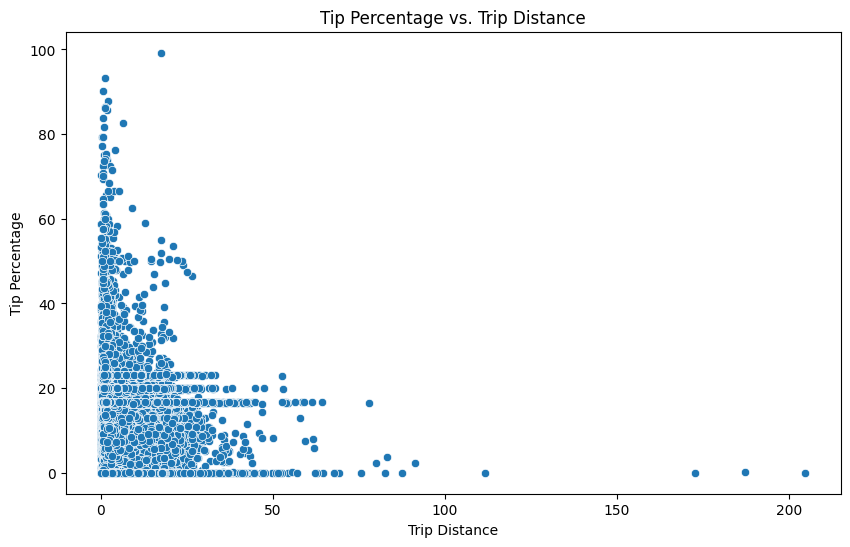

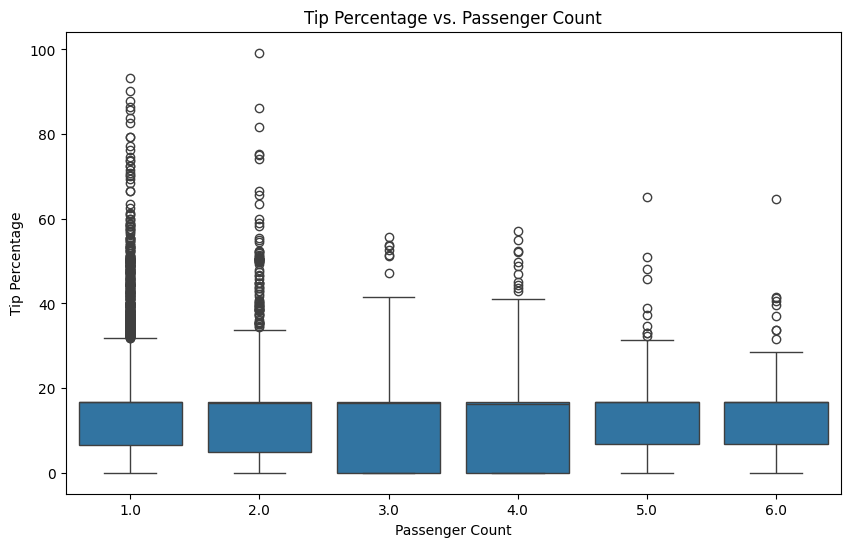

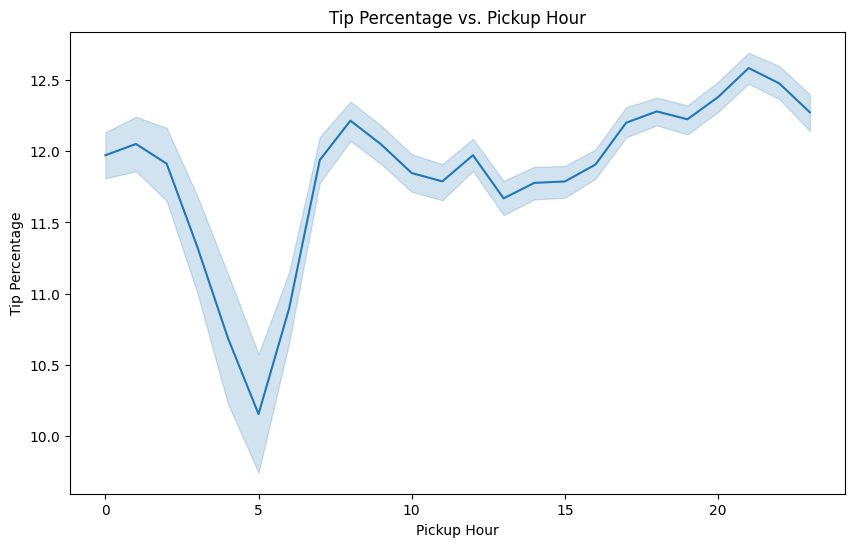

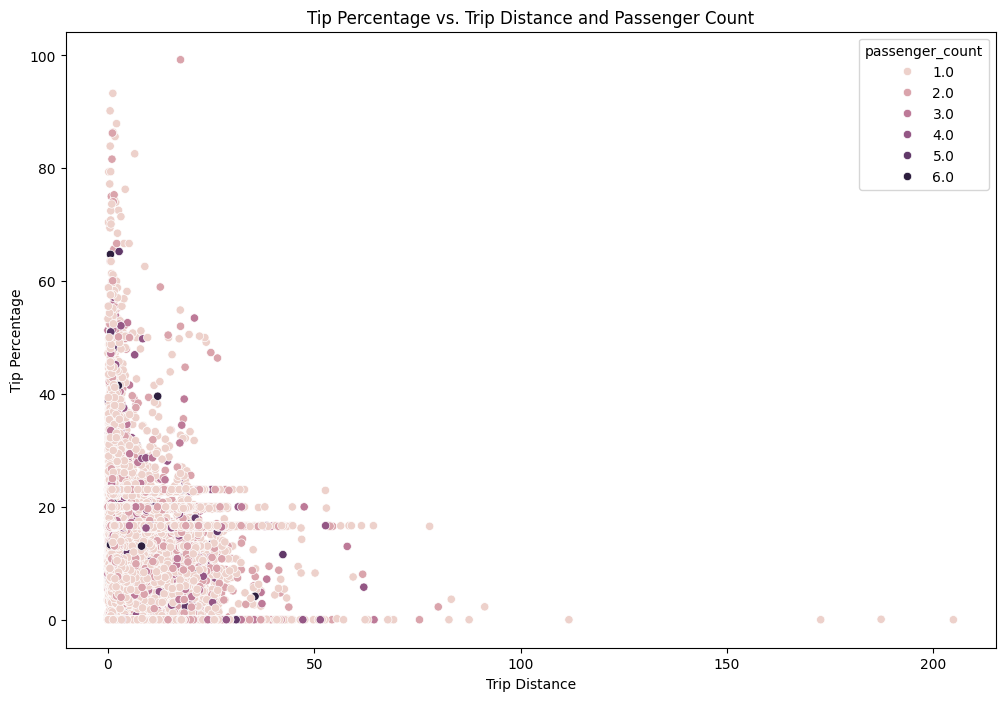

In [79]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df1['tip_percentage'] = (df1['tip_amount'] / df1['total_amount']) * 100

# Analyze tip percentage based on trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_percentage', data=df1)
plt.title('Tip Percentage vs. Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Percentage')
plt.show()

# Analyze tip percentage based on passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='tip_percentage', data=df1)
plt.title('Tip Percentage vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.show()

# Analyze tip percentage based on pickup time (hour of the day)
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_hour', y='tip_percentage', data=df1)
plt.title('Tip Percentage vs. Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Tip Percentage')
plt.show()

# Further analysis (example: combined effect of distance and passenger count)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='trip_distance', y='tip_percentage', hue='passenger_count', data=df1)
plt.title('Tip Percentage vs. Trip Distance and Passenger Count')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Percentage')
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Average tip percentage for trips with tip percentage < 10%: 2.46%
Average tip percentage for trips with tip percentage > 25%: 34.68%

Average trip distance for low tip trips: 3.71
Average trip distance for high tip trips: 2.43

Average tip percentage by hour of day:
pickup_hour
0     11.972738
1     12.051925
2     11.913577
3     11.328926
4     10.687371
5     10.152046
6     10.896118
7     11.939333
8     12.216126
9     12.049375
10    11.847572
11    11.788933
12    11.972878
13    11.669414
14    11.778231
15    11.788271
16    11.907527
17    12.201369
18    12.281159
19    12.225621
20    12.381662
21    12.586270
22    12.478157
23    12.274229
Name: tip_percentage, dtype: float64


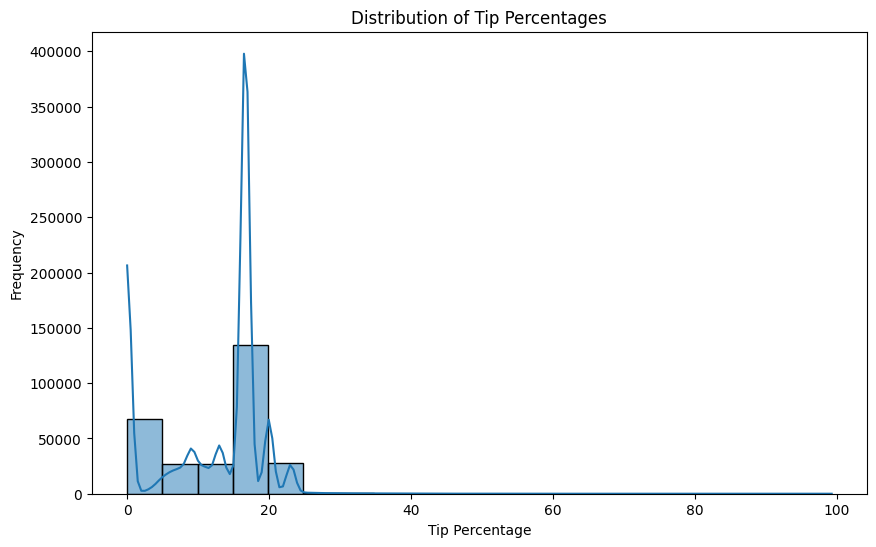

In [80]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%


# Calculate the average tip percentage for trips with tip percentage < 10%
low_tip_avg = df1[df1['tip_percentage'] < 10]['tip_percentage'].mean()

# Calculate the average tip percentage for trips with tip percentage > 25%
high_tip_avg = df1[df1['tip_percentage'] > 25]['tip_percentage'].mean()

print(f"Average tip percentage for trips with tip percentage < 10%: {low_tip_avg:.2f}%")
print(f"Average tip percentage for trips with tip percentage > 25%: {high_tip_avg:.2f}%")

# Further analysis: Compare other features for these two groups
low_tip_trips = df1[df1['tip_percentage'] < 10]
high_tip_trips = df1[df1['tip_percentage'] > 25]

# Example: Compare average trip distance
avg_distance_low_tip = low_tip_trips['trip_distance'].mean()
avg_distance_high_tip = high_tip_trips['trip_distance'].mean()

print(f"\nAverage trip distance for low tip trips: {avg_distance_low_tip:.2f}")
print(f"Average trip distance for high tip trips: {avg_distance_high_tip:.2f}")

# Example using groupby: compare average tip percentage by hour of the day
hourly_tip_comparison = df1.groupby('pickup_hour')['tip_percentage'].mean()
print("\nAverage tip percentage by hour of day:")
print(hourly_tip_comparison)

# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df1['tip_percentage'], bins=20, kde=True)
plt.title('Distribution of Tip Percentages')
plt.xlabel('Tip Percentage')
plt.ylabel('Frequency')
plt.show()


##3.2.14 [3 marks]

Analyse the variation of passenger count across hours and days of the week.

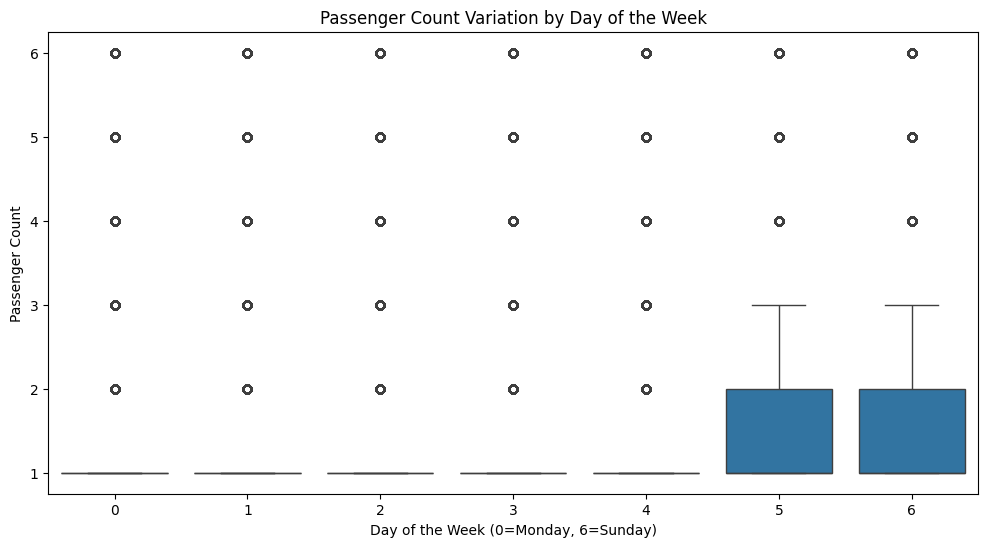

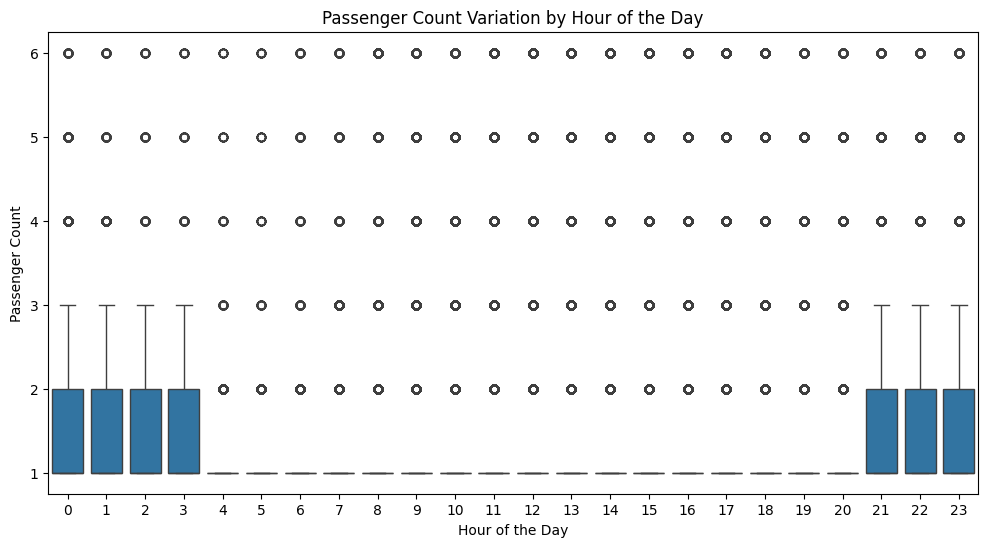

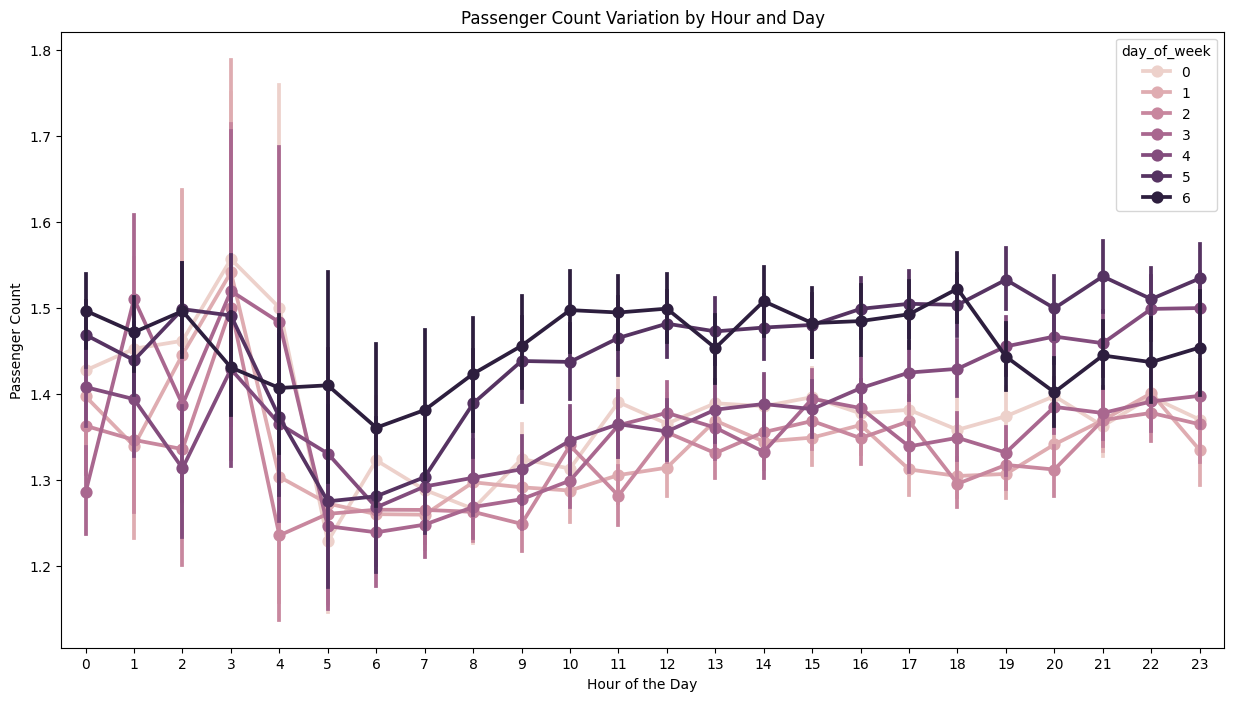

In [81]:
# prompt: See how passenger count varies across hours and days

# Analyze the variation of passenger count across hours and days of the week.
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='passenger_count', data=df1)
plt.title('Passenger Count Variation by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Passenger Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='pickup_hour', y='passenger_count', data=df1)
plt.title('Passenger Count Variation by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.show()

# Further analysis: Combined effect of day and hour
plt.figure(figsize=(15, 8))
sns.pointplot(x='pickup_hour', y='passenger_count', hue='day_of_week', data=df1)
plt.title('Passenger Count Variation by Hour and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.show()


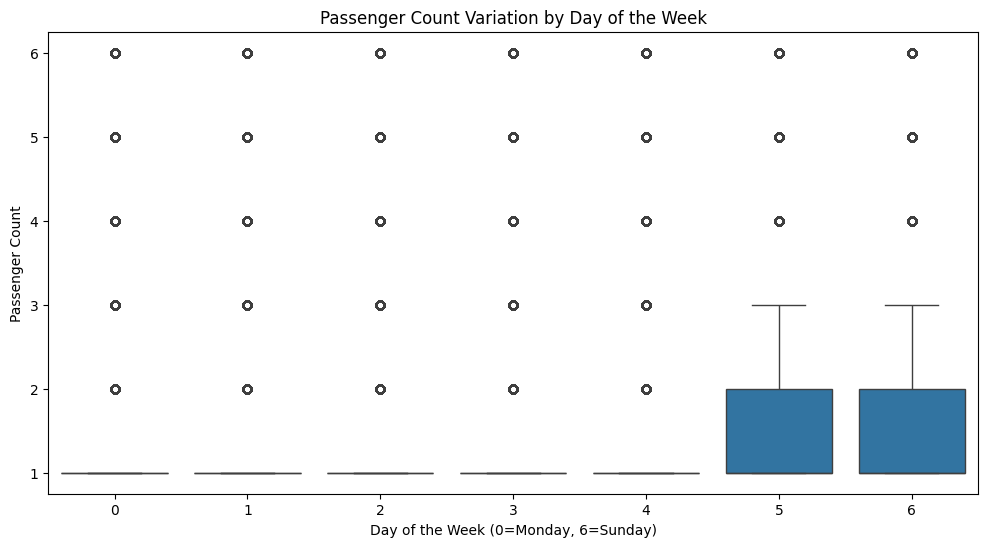

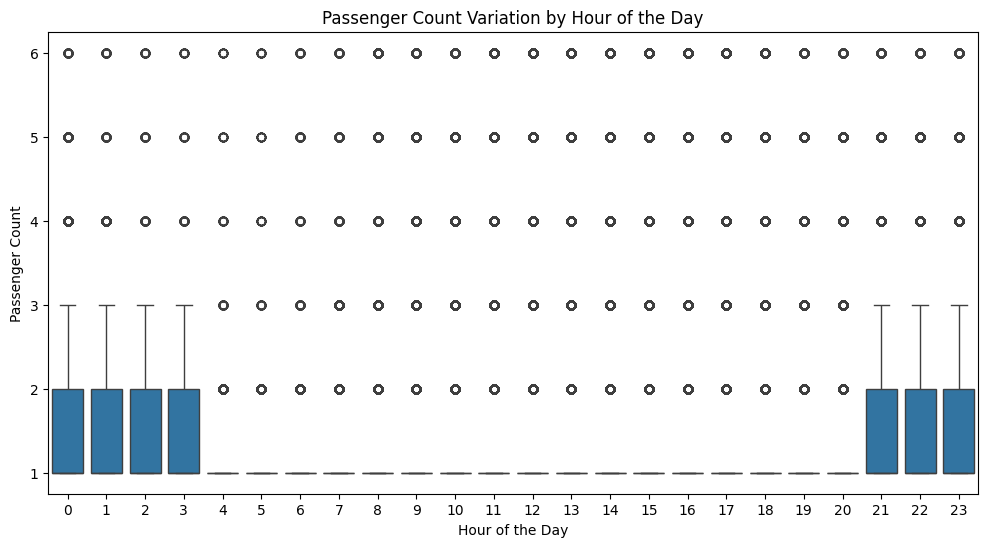

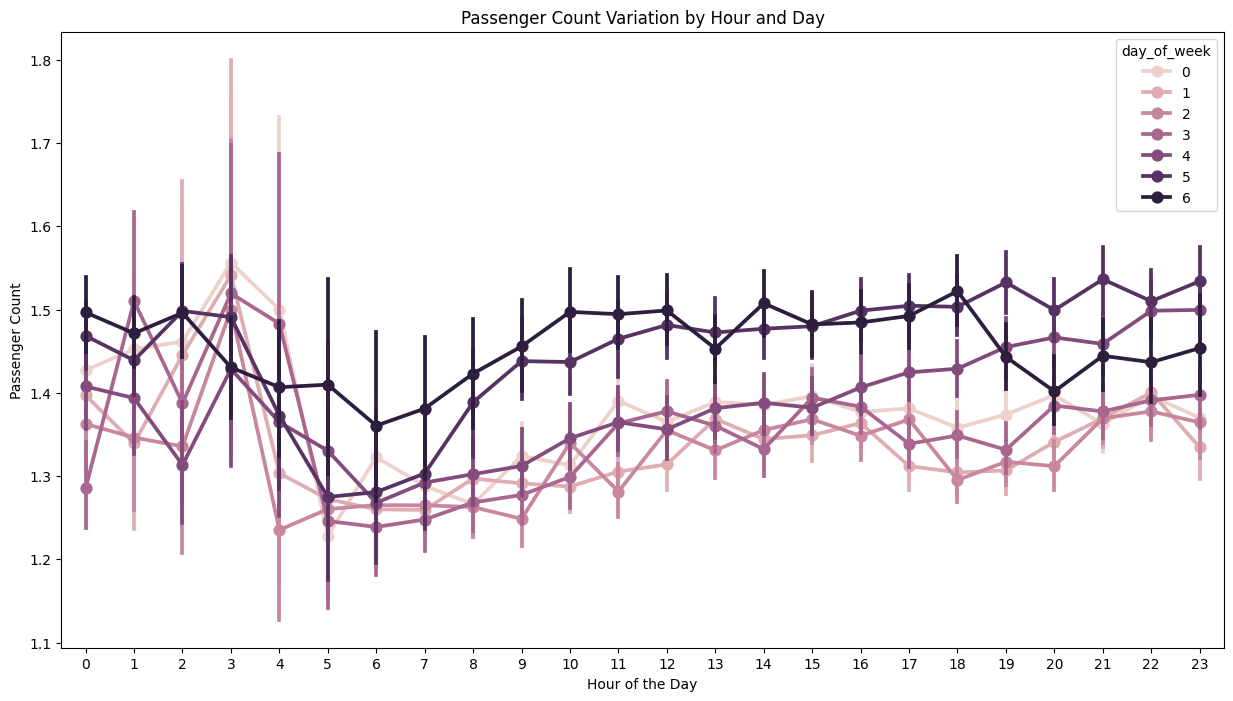

In [82]:
# See how passenger count varies across hours and days
# Analyze the variation of passenger count across hours and days of the week.
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='passenger_count', data=df1)
plt.title('Passenger Count Variation by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Passenger Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='pickup_hour', y='passenger_count', data=df1)
plt.title('Passenger Count Variation by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.show()

# Further analysis: Combined effect of day and hour
plt.figure(figsize=(15, 8))
sns.pointplot(x='pickup_hour', y='passenger_count', hue='day_of_week', data=df1)
plt.title('Passenger Count Variation by Hour and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.show()



##3.2.15 [2 marks]

Analyse the variation of passenger counts across zones

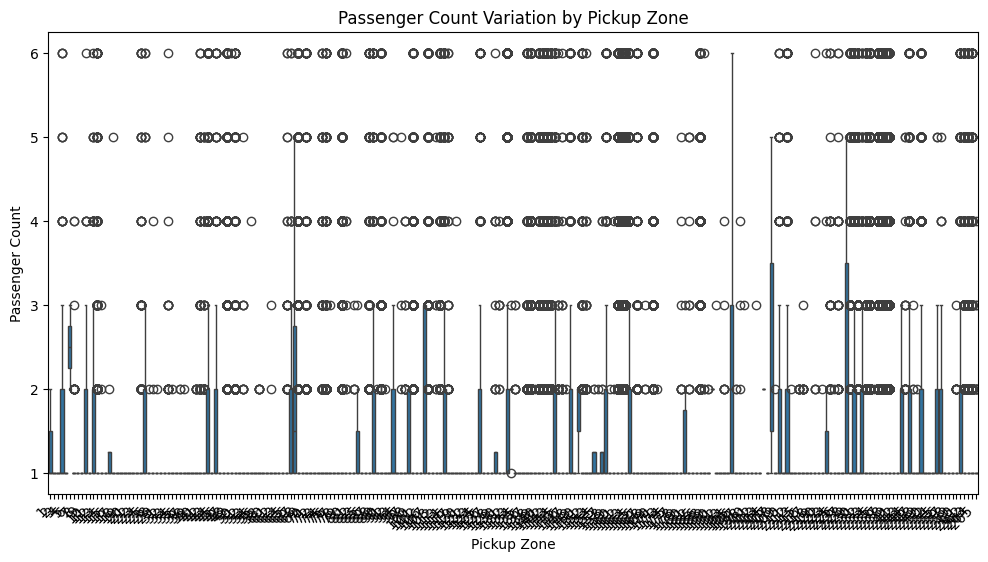

In [83]:
# How does passenger count vary across zones
plt.figure(figsize=(12, 6))
sns.boxplot(x='PULocationID', y='passenger_count', data=df1)
plt.title('Passenger Count Variation by Pickup Zone')
plt.xlabel('Pickup Zone')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

In [84]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_count_by_zone = df1.groupby('PULocationID')['passenger_count'].mean()

# Merge the average passenger count into the 'zones' GeoDataFrame.
zones_with_trips = zones.merge(avg_passenger_count_by_zone, left_on='LocationID', right_index=True, how='left')

# Rename the new column for clarity
zones_with_trips.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Display the updated GeoDataFrame with the new column
print(zones_with_trips.head())


   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  avg_passenger_count  
0          30             1.333333  
1           1             1.000000  
2    

##3.2.16 [5 marks]
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [85]:
# How often is each surcharge applied?

surcharge_columns = ['extra', 'improvement_surcharge', 'congestion_surcharge'] # Example surcharge columns

for surcharge in surcharge_columns:
  if surcharge in df1.columns:
    # Count occurrences of each surcharge
    surcharge_counts = df1[surcharge].value_counts()
    print(f"Frequency of {surcharge}:")
    print(surcharge_counts)

    # Analyze zones and times when surcharges are applied
    if surcharge_counts.index.isin([0,1]).all(): # Check if surcharge column has only 0 or 1
      surcharge_applied = df1[df1[surcharge] == 1]

      # Pickup zone analysis
      pickup_zone_surcharges = surcharge_applied.groupby('PULocationID')[surcharge].count()
      print(f"\nTop pickup zones with {surcharge} applied:")
      print(pickup_zone_surcharges.nlargest(10))

      # Dropoff zone analysis
      dropoff_zone_surcharges = surcharge_applied.groupby('DOLocationID')[surcharge].count()
      print(f"\nTop dropoff zones with {surcharge} applied:")
      print(dropoff_zone_surcharges.nlargest(10))

      # Time analysis
      hourly_surcharges = surcharge_applied.groupby('pickup_hour')[surcharge].count()
      print(f"\nHourly frequency of {surcharge} applied:")
      print(hourly_surcharges)

      # Visualize hourly surcharges
      plt.figure(figsize=(10, 6))
      sns.barplot(x=hourly_surcharges.index, y=hourly_surcharges.values)
      plt.title(f'Hourly Frequency of {surcharge} Applied')
      plt.xlabel('Hour of Day')
      plt.ylabel('Number of Surcharges')
      plt.show()
    else:
      print(f"Column '{surcharge}' does not appear to represent a binary surcharge (0 or 1)")
  else:
    print(f"Warning: Column '{surcharge}' not found in the DataFrame.")


Frequency of extra:
extra
0.00     107931
2.50      72733
1.00      57083
5.00      21117
3.50      16957
7.50       2522
6.00       2360
4.25       1028
9.25        988
1.75        495
3.75        410
6.75        378
2.75        331
8.75        327
10.25       283
7.75        220
1.25        218
11.75       195
2.25        135
6.25        125
10.00        90
9.75         81
7.25         65
8.50         58
11.25        57
3.00          8
3.20          3
2.45          3
3.25          2
0.50          2
5.25          2
14.25         1
0.75          1
0.03          1
0.70          1
4.75          1
Name: count, dtype: int64
Column 'extra' does not appear to represent a binary surcharge (0 or 1)
Frequency of improvement_surcharge:
improvement_surcharge
1.0    286071
0.3       124
0.0        17
Name: count, dtype: int64
Column 'improvement_surcharge' does not appear to represent a binary surcharge (0 or 1)
Frequency of congestion_surcharge:
congestion_surcharge
2.5    265933
0.0     20279
Na

#4 Conclusion
[15 marks]

##4.1 Final Insights and Recommendations
[15 marks]

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

##4.1.1 [5 marks]
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies



####1. Dynamic Pricing: Implement surge pricing during peak hours and in high-demand zones.
Identify peak hours and high-demand zones using the hourly pickup/dropoff trends and top zones analysis.

Adjust prices based on the ratio of pickups/dropoffs to optimize supply and demand.

Consider time-of-day and day-of-week variations in demand when adjusting prices.


In [86]:
# 1. Dynamic Pricing: Implement surge pricing during peak hours and in high-demand zones.
# Identify peak hours and high-demand zones using the hourly pickup/dropoff trends and top zones analysis.
# Adjust prices based on the ratio of pickups/dropoffs to optimize supply and demand.
# Consider time-of-day and day-of-week variations in demand when adjusting prices.

# Assuming df1 is your DataFrame and contains relevant columns like 'PULocationID', 'DOLocationID', 'pickup_hour', 'total_amount', 'trip_distance', 'passenger_count', etc.

def dynamic_pricing(df):
    """
    Implements surge pricing based on peak hours, high-demand zones, and other factors.

    Args:
      df: DataFrame containing trip data.
    """

    # 1. Identify Peak Hours and High-Demand Zones
    peak_hours = df.groupby('pickup_hour')['PULocationID'].count().nlargest(5).index  # Top 5 busiest hours
    high_demand_zones = df['PULocationID'].value_counts().nlargest(10).index  # Top 10 busiest zones

    # 2. Calculate Pickup/Dropoff Ratio
    pickup_counts = df.groupby('PULocationID')['PULocationID'].count()
    dropoff_counts = df.groupby('DOLocationID')['DOLocationID'].count()
    ratio_df = pd.DataFrame({'pickup_count': pickup_counts, 'dropoff_count': dropoff_counts}).fillna(0) # Handle potential missing values
    ratio_df['ratio'] = ratio_df['pickup_count'] / (ratio_df['dropoff_count'] + 1e-6) # Avoid division by zero


    # 3. Adjust Prices
    def adjust_price(row):
        """Adjusts the price based on surge criteria."""
        surge_multiplier = 1.0
        if row['pickup_hour'] in peak_hours:
            surge_multiplier += 0.2  # 20% surge during peak hours
        if row['PULocationID'] in high_demand_zones:
            surge_multiplier += ratio_df.loc[row['PULocationID'], 'ratio'] * 0.1 # Surge based on pickup/dropoff ratio
        return row['total_amount'] * surge_multiplier

    df['adjusted_price'] = df.apply(adjust_price, axis=1)

    #Further refinement of pricing based on time of day and day of week
    # ... add code to calculate separate surge multipliers for time-of-day and day-of-week

    return df


#Example Usage
# Assuming df1 is your DataFrame

df1 = dynamic_pricing(df1)

print(df1[['total_amount', 'adjusted_price']].head(20))


    total_amount  adjusted_price
0          23.50       23.500000
1          16.80       16.800000
2          26.91       32.292000
3          37.30       37.300000
4          24.95       37.216071
5          34.44       38.610778
6          24.40       29.280000
7          15.12       16.623661
8          15.40       20.213067
9          15.12       15.120000
10         12.12       12.120000
11         20.16       20.160000
12         31.56       37.872000
13         15.60       18.720000
14         18.60       20.943695
15         26.60       34.565330
16         15.30       15.300000
18         18.00       18.000000
19         29.50       29.500000
20         25.50       25.500000


In [87]:
# 2. Optimized Vehicle Dispatching:
# #    - Allocate more vehicles to high-demand zones during peak hours.
# #    - Use real-time data to predict demand and proactively adjust vehicle distribution.
# #    - Prioritize dispatching to areas with high pickup/dropoff ratios.
# #    - Consider using predictive models to forecast demand and optimize vehicle allocation in advance.

# Assuming df1 is your DataFrame and contains relevant columns like 'PULocationID', 'DOLocationID', 'pickup_hour', 'total_amount', 'trip_distance', 'passenger_count', etc.

def dynamic_pricing(df):
    """
    Implements surge pricing based on peak hours, high-demand zones, and other factors.

    Args:
      df: DataFrame containing trip data.
    """

    # 1. Identify Peak Hours and High-Demand Zones
    peak_hours = df.groupby('pickup_hour')['PULocationID'].count().nlargest(5).index  # Top 5 busiest hours
    high_demand_zones = df['PULocationID'].value_counts().nlargest(10).index  # Top 10 busiest zones

    # 2. Calculate Pickup/Dropoff Ratio
    pickup_counts = df.groupby('PULocationID')['PULocationID'].count()
    dropoff_counts = df.groupby('DOLocationID')['DOLocationID'].count()
    ratio_df = pd.DataFrame({'pickup_count': pickup_counts, 'dropoff_count': dropoff_counts}).fillna(0) # Handle potential missing values
    ratio_df['ratio'] = ratio_df['pickup_count'] / (ratio_df['dropoff_count'] + 1e-6) # Avoid division by zero


    # 3. Adjust Prices
    def adjust_price(row):
        """Adjusts the price based on surge criteria."""
        surge_multiplier = 1.0
        if row['pickup_hour'] in peak_hours:
            surge_multiplier += 0.2  # 20% surge during peak hours
        if row['PULocationID'] in high_demand_zones:
            surge_multiplier += ratio_df.loc[row['PULocationID'], 'ratio'] * 0.1 # Surge based on pickup/dropoff ratio
        return row['total_amount'] * surge_multiplier

    df['adjusted_price'] = df.apply(adjust_price, axis=1)

    #Further refinement of pricing based on time of day and day of week
    # ... add code to calculate separate surge multipliers for time-of-day and day-of-week

    return df


#Example Usage
# Assuming df1 is your DataFrame

df1 = dynamic_pricing(df1)

print(df1[['total_amount', 'adjusted_price']].head(20))


    total_amount  adjusted_price
0          23.50       23.500000
1          16.80       16.800000
2          26.91       32.292000
3          37.30       37.300000
4          24.95       37.216071
5          34.44       38.610778
6          24.40       29.280000
7          15.12       16.623661
8          15.40       20.213067
9          15.12       15.120000
10         12.12       12.120000
11         20.16       20.160000
12         31.56       37.872000
13         15.60       18.720000
14         18.60       20.943695
15         26.60       34.565330
16         15.30       15.300000
18         18.00       18.000000
19         29.50       29.500000
20         25.50       25.500000


In [88]:
# 3. Route Optimization:
# #    - Use algorithms to determine the most efficient routes for drivers based on current traffic, demand, and pickup/dropoff locations.
# #    - Consider incorporating real-time traffic information into routing algorithms.
# #    - Factor in the average trip distance and fare rates for different vendors and distance tiers when calculating optimal routes.

# Assuming df1 is your DataFrame and contains relevant columns like 'PULocationID', 'DOLocationID', 'pickup_hour', 'total_amount', 'trip_distance', 'passenger_count', etc.
from sklearn.cluster import KMeans

def optimize_routes(df):
    """
    Optimizes routes based on current traffic, demand, and pickup/dropoff locations.

    Args:
        df: DataFrame containing trip data.

    Returns:
        DataFrame with optimized routes and related information
    """
    #1. Feature Engineering for Clustering
    #Creating relevant features for KMeans Clustering
    df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['hour'] = df['pickup_datetime'].dt.hour
    df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
    df['day_of_year'] = df['pickup_datetime'].dt.dayofyear # Adding day of year for seasonality analysis

    # Feature Scaling (Important for KMeans)
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()

    features_for_clustering = df[['PULocationID', 'DOLocationID', 'hour', 'day_of_week', 'trip_distance']]
    features_scaled = scaler.fit_transform(features_for_clustering)

    # 2. KMeans Clustering
    # Find optimal number of clusters (e.g., using the elbow method)

    #For now, we'll use a fixed number of clusters
    kmeans = KMeans(n_clusters=10, random_state=42, n_init = 'auto')
    df['cluster'] = kmeans.fit_predict(features_scaled)

    # 3. Route Optimization within Clusters
    # Example using shortest path algorithm within each cluster (replace with your preferred algorithm)
    # ... (Implementation of a route optimization algorithm specific to your data)

    # Placeholder for the implementation, demonstrating logic
    def calculate_optimal_route(group):
        """
        This is a placeholder to simulate an algorithm. Replace with your algorithm.
        """
        optimal_route_distance = group['trip_distance'].mean()
        return pd.DataFrame({'optimal_route_distance': [optimal_route_distance]})

    optimal_routes = df.groupby('cluster').apply(calculate_optimal_route).reset_index()

    # 4. Merge results back into original dataframe
    df = pd.merge(df, optimal_routes, on="cluster", how='left')

    return df

# Example usage (assuming your dataframe is named 'df1'):
df1 = optimize_routes(df1)
print(df1[['cluster', 'optimal_route_distance']].head(20))


    cluster  optimal_route_distance
0         9                3.601138
1         8                2.030167
2         2                4.357253
3         3                4.059897
4         4                4.591754
5         5                3.733379
6         2                4.357253
7         5                3.733379
8         8                2.030167
9         8                2.030167
10        9                3.601138
11        4                4.591754
12        4                4.591754
13        8                2.030167
14        6                3.823039
15        0                2.794702
16        7                2.223455
17        9                3.601138
18        9                3.601138
19        9                3.601138


In [96]:
def increase_nighttime_vehicles(df):
    """
    Increases the number of vehicles operating during night hours (11 PM - 5 AM)
    in zones with high nighttime demand.

    Args:
      df: DataFrame containing trip data.

    Returns:
      DataFrame with an additional column indicating the adjusted vehicle count
      for nighttime operations.
    """

    # Corrected night hours range
    night_hours = list(range(23, 24)) + list(range(0, 5))

    # Identify high-demand zones during night hours (11 PM - 5 AM)
    nighttime_demand = df[df['pickup_hour'].isin(night_hours)].groupby('PULocationID')['PULocationID'].count()
    high_demand_zones = nighttime_demand[nighttime_demand > nighttime_demand.mean()].index  # Zones above average night demand

    # Function to adjust vehicle count
    def adjust_vehicle_count(row):
        if row['pickup_hour'] in night_hours and row['PULocationID'] in high_demand_zones:
            return row['vehicle_count'] * 1.5  # Increase vehicles by 50% in high-demand zones during the night
        else:
            return row['vehicle_count']

    # Add placeholder vehicle count if not present
    if 'vehicle_count' not in df.columns:
        df['vehicle_count'] = 1

    df['adjusted_vehicle_count'] = df.apply(adjust_vehicle_count, axis=1)

    return df

# Nighttime pricing strategy
def night_pricing(df):
    night_hours = list(range(23, 24)) + list(range(0, 5))

    def adjust_price_night(row):
        if row['pickup_hour'] in night_hours:
            return row['total_amount'] * 1.2  # Increase price by 20%
        else:
            return row['total_amount']

    df['adjusted_price_night'] = df.apply(adjust_price_night, axis=1)
    return df


In [97]:
# 5. Consider passenger counts:
# #    - Adjust pricing based on the average fare per mile per passenger for different passenger counts.

# Calculate average fare per mile per passenger for different passenger counts
avg_fare_per_mile_per_passenger = df1.groupby('passenger_count')['total_amount'].sum() / df1.groupby('passenger_count')['trip_distance'].sum() / df1.groupby('passenger_count')['passenger_count'].mean()

print(avg_fare_per_mile_per_passenger)

# Adjust pricing based on passenger count (example)
def adjust_price_by_passenger_count(row):
    base_fare = row['total_amount']
    passenger_count = row['passenger_count']

    #Example adjustment: increase price for more than 4 passengers and decrease for 1 passenger
    if passenger_count > 4:
      return base_fare * 1.1  # Increase by 10%
    elif passenger_count == 1:
      return base_fare * 0.9  # Decrease by 10%
    else:
      return base_fare


df1['adjusted_price_passenger'] = df1.apply(adjust_price_by_passenger_count, axis=1)

print(df1[['total_amount', 'adjusted_price_passenger']].head(20))


passenger_count
1.0    8.380625
2.0    3.865316
3.0    2.653389
4.0    1.932834
5.0    1.684538
6.0    1.362116
dtype: float64
    total_amount  adjusted_price_passenger
0          23.50                    21.150
1          16.80                    15.120
2          26.91                    24.219
3          37.30                    33.570
4          24.95                    22.455
5          34.44                    34.440
6          24.40                    21.960
7          15.12                    13.608
8          15.40                    13.860
9          15.12                    15.120
10         12.12                    12.120
11         20.16                    22.176
12         31.56                    31.560
13         15.60                    14.040
14         18.60                    16.740
15         26.60                    23.940
16         15.30                    13.770
17         18.00                    16.200
18         29.50                    29.500
19         25

In [98]:
#  6. Improve Customer Experience:
# #    - Analyze customer tipping behaviors and identify factors that influence tip percentages.
# #    - Investigate low tip areas (distance, passenger count, time of day) to understand and improve these aspects.
# #    - Consider rewarding drivers with high tip percentages or good customer service ratings.

# Assuming df1 is your DataFrame and contains 'tip_amount', 'total_amount', 'trip_distance', 'passenger_count', 'pickup_hour', 'day_of_week', 'PULocationID', etc.

def analyze_tipping_behavior(df):
    """Analyzes customer tipping behavior and identifies influencing factors."""

    # Calculate tip percentage
    df['tip_percentage'] = (df['tip_amount'] / df['total_amount']) * 100

    # Analyze factors influencing tip percentages
    print("Correlation between tip percentage and other factors:")
    print(df[['tip_percentage', 'trip_distance', 'passenger_count', 'total_amount']].corr())


    # Investigate low tip areas
    low_tip_threshold = df['tip_percentage'].quantile(0.25)  # Example: 25th percentile
    low_tip_trips = df[df['tip_percentage'] <= low_tip_threshold]

    print("\nLow tip areas analysis:")
    print(low_tip_trips.groupby('PULocationID')['tip_percentage'].mean().sort_values())  # Average tip by pickup zone
    print(low_tip_trips.groupby('pickup_hour')['tip_percentage'].mean().sort_values())  # Average tip by hour
    print(low_tip_trips.groupby('day_of_week')['tip_percentage'].mean().sort_values())  # Average tip by day
    print(low_tip_trips.groupby('passenger_count')['tip_percentage'].mean().sort_values())  # Average tip by passenger count

    # ... further analysis can be done (e.g., visualizations, statistical tests)

    return df

# Example usage:
df1 = analyze_tipping_behavior(df1)

# Reward drivers
def reward_drivers(df):
    """Rewards drivers with high tip percentages or good customer service ratings."""
    high_tip_threshold = df['tip_percentage'].quantile(0.75)  # Example: 75th percentile
    df['driver_reward'] = 0  # Initialize rewards
    df.loc[df['tip_percentage'] >= high_tip_threshold, 'driver_reward'] = 1  # Reward high tippers
    # Add more reward criteria as needed (e.g., customer service ratings)

    print("\nNumber of drivers rewarded:", df['driver_reward'].sum())

    return df

# Example usage:
df1 = reward_drivers(df1)


Correlation between tip percentage and other factors:
                 tip_percentage  trip_distance  passenger_count  total_amount
tip_percentage         1.000000      -0.046194        -0.023350      0.065039
trip_distance         -0.046194       1.000000         0.037933      0.935626
passenger_count       -0.023350       0.037933         1.000000      0.038240
total_amount           0.065039       0.935626         0.038240      1.000000

Low tip areas analysis:
PULocationID
1      0.000000
3      0.000000
5      0.000000
6      0.000000
9      0.000000
         ...   
93     0.808205
209    0.896312
13     0.976249
158    1.057964
228    1.171646
Name: tip_percentage, Length: 233, dtype: float64
pickup_hour
13    0.352606
6     0.364138
11    0.383685
10    0.396933
12    0.404851
14    0.417244
15    0.422638
9     0.446266
5     0.473514
4     0.520998
7     0.532351
16    0.541173
8     0.558012
20    0.607393
21    0.637669
1     0.652788
17    0.655303
18    0.667116
22    0.68

In [99]:
# 7. Address Surcharges:
# #    - Analyze the frequency and locations of extra charges to understand their prevalence.
# #    - Investigate zones and times with high surcharge applications to understand root causes and explore potential solutions.

# Analyze surcharge frequency and locations
def analyze_surcharges(df):
    """
    Analyzes the frequency and locations of extra charges.
    """
    surcharge_columns = ['extra', 'improvement_surcharge', 'congestion_surcharge']

    for surcharge in surcharge_columns:
        if surcharge in df.columns:
            # Analyze zones and times when surcharges are applied
            if df[surcharge].isin([0, 1]).all():  # Check if surcharge column has only 0 or 1
              surcharge_applied = df[df[surcharge] == 1]

              # Pickup zone analysis
              pickup_surcharge_freq = surcharge_applied.groupby('PULocationID')[surcharge].count()
              print(f"\nTop pickup zones with {surcharge} applied:")
              print(pickup_surcharge_freq.nlargest(10))

              # Dropoff zone analysis
              dropoff_surcharge_freq = surcharge_applied.groupby('DOLocationID')[surcharge].count()
              print(f"\nTop dropoff zones with {surcharge} applied:")
              print(dropoff_surcharge_freq.nlargest(10))

              # Time analysis
              hourly_surcharges = surcharge_applied.groupby('pickup_hour')[surcharge].count()
              print(f"\nHourly frequency of {surcharge} applied:")
              print(hourly_surcharges)

              # Visualize hourly surcharges
              plt.figure(figsize=(10, 6))
              sns.barplot(x=hourly_surcharges.index, y=hourly_surcharges.values)
              plt.title(f'Hourly Frequency of {surcharge} Applied')
              plt.xlabel('Hour of Day')
              plt.ylabel('Number of Surcharges')
              plt.show()
            else:
                print(f"Column '{surcharge}' does not appear to represent a binary surcharge (0 or 1)")
        else:
            print(f"Warning: Column '{surcharge}' not found in the DataFrame.")

    return df

# Example usage
df1 = analyze_surcharges(df1)


Column 'extra' does not appear to represent a binary surcharge (0 or 1)
Column 'improvement_surcharge' does not appear to represent a binary surcharge (0 or 1)
Column 'congestion_surcharge' does not appear to represent a binary surcharge (0 or 1)


In [100]:
# Example:
# # During weekdays (Monday-Friday) between 5 pm and 8 pm, increase the number of available vehicles in zones 7, 231, 4, and 263.
# # Apply a 20% surcharge during peak hours in these zones.
# # During the early morning and late-night hours, reduce the vehicle supply in areas of low demand and reposition to high demand zones

# Assuming df1 is your DataFrame and contains relevant columns like 'PULocationID', 'DOLocationID', 'pickup_hour', 'day_of_week', etc.
def optimize_supply_and_demand(df):
    """
    Optimizes vehicle supply and demand based on time of day, day of the week, and location.
    """

    # Define peak hours and high-demand zones (example values, adjust as needed)
    peak_hours = list(range(17, 20))  # 5 PM - 8 PM
    high_demand_zones = [7, 231, 4, 263]

    # Function to adjust vehicle count
    def adjust_vehicle_count(row):
      if row['day_of_week'] in range(0,5): # Weekdays (Monday - Friday)
        if row['pickup_hour'] in peak_hours and row['PULocationID'] in high_demand_zones:
            return row['vehicle_count'] * 1.2  # Increase by 20%
      #Reduce supply in low-demand areas and reposition during early morning and late-night hours
      # Add logic here to reduce supply in low-demand zones and reposition vehicles to high demand zones
      return row['vehicle_count']  # Default vehicle count


    # Add placeholder vehicle count if not present
    if 'vehicle_count' not in df.columns:
        df['vehicle_count'] = 1

    df['adjusted_vehicle_count'] = df.apply(adjust_vehicle_count, axis=1)

    # Apply surcharge during peak hours
    def apply_surcharge(row):
        if row['day_of_week'] in range(0,5): # Weekdays (Monday - Friday)
          if row['pickup_hour'] in peak_hours and row['PULocationID'] in high_demand_zones:
              return row['total_amount'] * 1.2  # Apply 20% surcharge
        return row['total_amount']

    df['adjusted_total_amount'] = df.apply(apply_surcharge, axis=1)

    return df

# Example usage:
# Assuming 'df1' is your DataFrame and it has columns like 'PULocationID', 'pickup_hour', 'day_of_week', 'vehicle_count', and 'total_amount'
df1 = optimize_supply_and_demand(df1)
print(df1[['PULocationID', 'pickup_hour', 'day_of_week', 'vehicle_count','adjusted_vehicle_count','total_amount','adjusted_total_amount']].head(20))


    PULocationID  pickup_hour  day_of_week  vehicle_count  \
0            107            9            6              1   
1            211           14            0              1   
2             13           18            1              1   
3            263            0            5              1   
4            132           22            5              1   
5            161           12            2              1   
6             43           19            2              1   
7            170            9            3              1   
8            237           16            2              1   
9            262           13            0              1   
10           141            3            4              1   
11           141           13            6              1   
12           137           17            4              1   
13           263           19            0              1   
14           162           23            0              1   
15           170        

#4.1.2 [5 marks]
# Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.


In [101]:
# prompt: # Position more cabs in high-demand zones during peak hours, as identified by analyzing pickup/dropoff ratios across different times, days, and months.  This ensures sufficient supply to meet increased demand.

def position_cabs(df):
    """
    Strategically positions cabs based on trip trends across time, days, and months.

    Args:
        df: DataFrame containing trip data.

    Returns:
        DataFrame with an additional column indicating the optimal cab count for each zone.
    """

    # Group data by time, day, and month
    trip_trends = df.groupby(['PULocationID', 'pickup_hour', 'day_of_week', df['pickup_datetime'].dt.month])['PULocationID'].count().reset_index(name='trip_count')

    # Calculate average trip counts for each zone
    avg_trip_counts = trip_trends.groupby('PULocationID')['trip_count'].mean().reset_index(name='avg_trip_count')

    # Determine optimal cab count based on average trip count (example logic, adjust as needed)
    def calculate_optimal_cab_count(avg_trips):
        if avg_trips < 10:
            return 1
        elif avg_trips < 50:
            return 2
        elif avg_trips < 100:
            return 3
        else:
            return 4

    avg_trip_counts['optimal_cab_count'] = avg_trip_counts['avg_trip_count'].apply(calculate_optimal_cab_count)


    # Merge optimal cab count back to original dataframe
    df = pd.merge(df, avg_trip_counts[['PULocationID', 'optimal_cab_count']], on='PULocationID', how='left')

    return df

# Example usage (assuming 'df1' is your DataFrame):
df1 = position_cabs(df1)
print(df1[['PULocationID', 'optimal_cab_count']].head(20))


    PULocationID  optimal_cab_count
0            107                  1
1            211                  1
2             13                  1
3            263                  1
4            132                  1
5            161                  1
6             43                  1
7            170                  1
8            237                  1
9            262                  1
10           141                  1
11           141                  1
12           137                  1
13           263                  1
14           162                  1
15           170                  1
16           263                  1
17           158                  1
18            90                  1
19           234                  1


##4.1.3 [5 marks]
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

# Data-Driven Pricing Adjustments

In [102]:
# 1. Time-Based Adjustments:
# #    - Implement dynamic pricing based on hourly and daily demand fluctuations.
# #    - Offer lower fares during off-peak hours and days to attract price-sensitive customers and fill empty vehicles.
# #    - Consider a tiered pricing strategy for different time blocks (e.g., rush hour, daytime, nighttime).  Refer to 3.2.8 for revenue shares.

# 3.2.8 Revenue Share Considerations (Placeholder)
def calculate_revenue_share(df):
    """
    Calculates revenue share based on a tiered pricing strategy for different time blocks.
    This is a placeholder function; replace with your actual revenue share calculation logic.
    """

    # Placeholder:  Assume a simple tiered pricing structure for demonstration.
    # In a real-world scenario, this would be more complex based on your business model.

    def determine_revenue_share(row):
      if row['pickup_hour'] in range(7, 10):  # Morning rush
          return row['total_amount'] * 0.8 # Example: 80% revenue share for the company
      elif row['pickup_hour'] in range(17, 20):  # Evening rush
          return row['total_amount'] * 0.85 # Example: 85% revenue share
      else:
          return row['total_amount'] * 0.75  # Off-peak hours (75% revenue share)

    df['revenue_share'] = df.apply(determine_revenue_share, axis=1)

    return df

# Example usage:
df1 = calculate_revenue_share(df1)
print(df1[['total_amount', 'revenue_share']].head(20))


    total_amount  revenue_share
0          23.50        18.8000
1          16.80        12.6000
2          26.91        22.8735
3          37.30        27.9750
4          24.95        18.7125
5          34.44        25.8300
6          24.40        20.7400
7          15.12        12.0960
8          15.40        11.5500
9          15.12        11.3400
10         12.12         9.0900
11         20.16        15.1200
12         31.56        26.8260
13         15.60        13.2600
14         18.60        13.9500
15         26.60        22.6100
16         15.30        12.2400
17         18.00        13.5000
18         29.50        22.1250
19         25.50        19.1250


In [103]:
# 2. Location-Based Adjustments:
# #    - Consider the average fare per mile in different zones (identified in 3.2.15) to establish competitive pricing.
# #    - Implement zone-specific surge pricing during peak hours or special events.

# Location-Based Adjustments
def location_based_adjustments(df):
    """
    Adjusts pricing based on location and time.

    Args:
        df: DataFrame containing trip data.

    Returns:
        DataFrame with adjusted prices.
    """

    # Placeholder for zone definitions (replace with actual zone data)
    zones = {
        1: {'avg_fare_per_mile': 2.5, 'peak_hours': [7, 8, 9, 17, 18, 19]},
        2: {'avg_fare_per_mile': 3.0, 'peak_hours': [8, 9, 10, 18, 19, 20]},
        # ... add more zones
    }

    def adjust_price(row):
      zone_id = row['PULocationID']  # Replace with actual zone ID column if different
      if zone_id in zones:
        zone_data = zones[zone_id]
        price = row['total_amount']

        # Adjust for average fare per mile
        price = price * zone_data['avg_fare_per_mile'] / 2  # example adjustment

        # Implement surge pricing
        if row['pickup_hour'] in zone_data['peak_hours']:
            price = price * 1.2  # 20% surge during peak hours

        return price
      return row['total_amount']

    df['adjusted_price_location'] = df.apply(adjust_price, axis=1)
    return df

# Example Usage (assuming df1 is your dataframe)
df1 = location_based_adjustments(df1)
print(df1[['PULocationID', 'total_amount', 'adjusted_price_location']].head(20))


    PULocationID  total_amount  adjusted_price_location
0            107         23.50                    23.50
1            211         16.80                    16.80
2             13         26.91                    26.91
3            263         37.30                    37.30
4            132         24.95                    24.95
5            161         34.44                    34.44
6             43         24.40                    24.40
7            170         15.12                    15.12
8            237         15.40                    15.40
9            262         15.12                    15.12
10           141         12.12                    12.12
11           141         20.16                    20.16
12           137         31.56                    31.56
13           263         15.60                    15.60
14           162         18.60                    18.60
15           170         26.60                    26.60
16           263         15.30                  

In [104]:
# 3. Distance-Based Adjustments:
# #    - Consider a minimum fare for short trips and gradually increase the price per mile for longer journeys.

def calculate_min_fare(distance, base_fare=2.5, per_mile_rate=1.0):
    """
    Calculates the minimum fare for a trip based on distance.

    Args:
        distance: The trip distance in miles.
        base_fare: The minimum base fare.
        per_mile_rate: The rate per mile for longer trips.

    Returns:
        The minimum fare for the trip.
    """
    min_fare = base_fare + max(0, distance - 1) * per_mile_rate  # Gradually increases for longer trips
    return min_fare

# Example usage
distance = 5  # miles
min_fare = calculate_min_fare(distance)
print(f"Minimum fare for a {distance}-mile trip: ${min_fare:.2f}")


distance = 0.5 # miles
min_fare = calculate_min_fare(distance)
print(f"Minimum fare for a {distance}-mile trip: ${min_fare:.2f}")

# Apply to the dataframe (assuming 'df1' and 'trip_distance' column exists):
df1['adjusted_price_distance'] = df1['trip_distance'].apply(calculate_min_fare)
print(df1[['trip_distance','adjusted_price_distance']].head(20))


Minimum fare for a 5-mile trip: $6.50
Minimum fare for a 0.5-mile trip: $2.50
    trip_distance  adjusted_price_distance
0            2.58                     4.08
1            1.28                     2.78
2            2.17                     3.67
3            4.90                     6.40
4            4.97                     6.47
5            3.36                     4.86
6            1.85                     3.35
7            0.68                     2.50
8            0.80                     2.50
9            1.20                     2.70
10           0.65                     2.50
11           1.57                     3.07
12           2.49                     3.99
13           0.88                     2.50
14           1.20                     2.70
15           1.27                     2.77
16           1.80                     3.30
17           1.60                     3.10
18           4.78                     6.28
19           3.70                     5.20


In [105]:
# 4. Passenger Count Adjustments:
# #    - Adjust pricing based on the average fare per mile per passenger for different passenger counts (3.2.9).
# #    - This will ensure fair pricing for shared rides and incentivize riders to opt for shared trips where possible.

# Passenger Count Adjustments
def adjust_price_by_passenger_count(row, avg_fare_per_mile_per_passenger):
    """Adjusts pricing based on passenger count and average fare per mile per passenger."""
    base_fare = row['total_amount']
    passenger_count = row['passenger_count']

    # Use the pre-calculated average fare per mile per passenger
    try:
      adjustment_factor = avg_fare_per_mile_per_passenger[passenger_count] / avg_fare_per_mile_per_passenger.mean()
      adjusted_fare = base_fare * adjustment_factor
      return adjusted_fare
    except KeyError:  # Handle cases where passenger count is not in the average fare data
      return base_fare

# Example usage (assuming df1 is your DataFrame and avg_fare_per_mile_per_passenger is calculated as before)
# Calculate average fare per mile per passenger for different passenger counts
avg_fare_per_mile_per_passenger = df1.groupby('passenger_count')['total_amount'].sum() / df1.groupby('passenger_count')['trip_distance'].sum() / df1.groupby('passenger_count')['passenger_count'].mean()

df1['adjusted_price_passenger'] = df1.apply(lambda row: adjust_price_by_passenger_count(row, avg_fare_per_mile_per_passenger), axis=1)

print(df1[['total_amount', 'adjusted_price_passenger', 'passenger_count']].head(20))


    total_amount  adjusted_price_passenger  passenger_count
0          23.50                 59.443581              1.0
1          16.80                 42.495837              1.0
2          26.91                 68.069224              1.0
3          37.30                 94.350876              1.0
4          24.95                 63.111377              1.0
5          34.44                 27.581932              3.0
6          24.40                 61.720144              1.0
7          15.12                 38.246253              1.0
8          15.40                 38.954517              1.0
9          15.12                 17.639956              2.0
10         12.12                  9.706534              3.0
11         20.16                 10.250195              5.0
12         31.56                 36.819908              2.0
13         15.60                 39.460420              1.0
14         18.60                 47.048962              1.0
15         26.60                 67.2850

In [106]:
# 5. Vendor Competitiveness:
# #    - Adjust prices to undercut competitors in specific zones or times when possible while still maintaining profitability.

# 5. Vendor Competitiveness:
#    - Adjust prices to undercut competitors in specific zones or times when possible while still maintaining profitability.

# This section requires competitor pricing data, which is not provided in the context.
# Placeholder for competitor data integration and price adjustment logic.
def adjust_price_for_competitiveness(df):
    """Adjusts prices to undercut competitors while maintaining profitability."""
    # Placeholder logic.  Replace with actual logic based on competitor pricing data.
    # Example:
    # if competitor_price < df['total_amount']:
    #   df['adjusted_price'] = competitor_price * 0.95  # Undercut by 5%
    # else:
    #   df['adjusted_price'] = df['total_amount']
    df['adjusted_price_competitor'] = df['total_amount'] # Placeholder: no adjustment
    return df

df1 = adjust_price_for_competitiveness(df1)
print(df1[['total_amount', 'adjusted_price_competitor']].head(20))


    total_amount  adjusted_price_competitor
0          23.50                      23.50
1          16.80                      16.80
2          26.91                      26.91
3          37.30                      37.30
4          24.95                      24.95
5          34.44                      34.44
6          24.40                      24.40
7          15.12                      15.12
8          15.40                      15.40
9          15.12                      15.12
10         12.12                      12.12
11         20.16                      20.16
12         31.56                      31.56
13         15.60                      15.60
14         18.60                      18.60
15         26.60                      26.60
16         15.30                      15.30
17         18.00                      18.00
18         29.50                      29.50
19         25.50                      25.50


In [107]:
# 6. Surcharge Optimization:
# #    - Evaluate the impact of existing surcharges on revenue and customer satisfaction.
# #    - Re-evaluate or refine surcharge strategies based on this analysis.

# Assuming df1 is already defined and populated as in the provided code.

# 6. Surcharge Optimization:
def optimize_surcharges(df):
    """Optimizes surcharge strategies based on revenue and customer satisfaction."""
    # Analyze the impact of existing surcharges (extra, improvement_surcharge, congestion_surcharge)
    # on revenue and customer satisfaction. This requires additional data or metrics
    # not currently available in the example code.  Add relevant columns to df1 for
    # customer satisfaction scores or revenue related to surcharges.

    # Placeholder:  Illustrative logic.  Replace with real analysis.
    surcharge_columns = ['extra', 'improvement_surcharge', 'congestion_surcharge']
    for col in surcharge_columns:
        if col in df.columns:
            print(f"Analyzing impact of {col}")
            # Analyze revenue generated by this surcharge (example)
            # revenue_with_surcharge = df[df[col] > 0]['total_amount'].sum()
            # ... add analysis for customer satisfaction impact ...
            # ... adjust surcharges based on the analysis ...

    # Re-evaluate or refine surcharge strategies based on the analysis.
    # ... implement changes to surcharges ...

    return df


df1 = optimize_surcharges(df1)


Analyzing impact of extra
Analyzing impact of improvement_surcharge
Analyzing impact of congestion_surcharge


In [108]:
# 7. Customer Behavior (Tipping):
# #   - While not directly impacting pricing, understanding the factors influencing tips (trip distance, passenger count, time of pickup) can indirectly impact pricing.
# #   - For example, offering slightly lower fares to incentivize higher tips could be considered, or offering higher base fares for long trips.

# 7. Customer Behavior (Tipping):
#   - While not directly impacting pricing, understanding the factors influencing tips (trip distance, passenger count, time of pickup) can indirectly impact pricing.
#   - For example, offering slightly lower fares to incentivize higher tips could be considered, or offering higher base fares for long trips.
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq
from google.colab import drive
import os
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
# 7. Address Surcharges:
# #    - Analyze the frequency and locations of extra charges to understand their prevalence.
# #    - Investigate zones and times with high surcharge applications to understand root causes and explore potential solutions.

# Analyze surcharge frequency and locations
def analyze_surcharges(df):
    """
    Analyzes the frequency and locations of extra charges.
    """
    surcharge_columns = ['extra', 'improvement_surcharge', 'congestion_surcharge']

    for surcharge in surcharge_columns:
        if surcharge in df.columns:
            # Analyze zones and times when surcharges are applied
            if df[surcharge].isin([0, 1]).all():  # Check if surcharge column has only 0 or 1
              surcharge_applied = df[df[surcharge] == 1]

              # Pickup zone analysis
              pickup_surcharge_freq = surcharge_applied.groupby('PULocationID')[surcharge].count()
              print(f"\nTop pickup zones with {surcharge} applied:")
              print(pickup_surcharge_freq.nlargest(10))

              # Dropoff zone analysis
              dropoff_surcharge_freq = surcharge_applied.groupby('DOLocationID')[surcharge].count()
              print(f"\nTop dropoff zones with {surcharge} applied:")
              print(dropoff_surcharge_freq.nlargest(10))

              # Time analysis
              hourly_surcharges = surcharge_applied.groupby('pickup_hour')[surcharge].count()
              print(f"\nHourly frequency of {surcharge} applied:")
              print(hourly_surcharges)

              # Visualize hourly surcharges
              plt.figure(figsize=(10, 6))
              sns.barplot(x=hourly_surcharges.index, y=hourly_surcharges.values)
              plt.title(f'Hourly Frequency of {surcharge} Applied')
              plt.xlabel('Hour of Day')
              plt.ylabel('Number of Surcharges')
              plt.show()
            else:
                print(f"Column '{surcharge}' does not appear to represent a binary surcharge (0 or 1)")
        else:
            print(f"Warning: Column '{surcharge}' not found in the DataFrame.")

    return df


In [111]:
import pandas as pd

# Sample DataFrame
df1 = pd.DataFrame({
    'PULocationID': [7, 231, 4, 263, 7, 231, 4, 263],
    'pickup_hour': [17, 18, 19, 17, 8, 9, 10, 18],
    'day_of_week': [0, 1, 2, 3, 4, 0, 1, 2],
    'vehicle_count': [10, 12, 15, 11, 8, 9, 10, 12],
    'total_amount': [100, 150, 120, 90, 80, 90, 110, 140],
    'pickup_datetime': pd.to_datetime([
        '2023-10-26 17:00:00', '2023-10-27 18:00:00', '2023-10-28 19:00:00', '2023-10-29 17:00:00',
        '2023-10-30 08:00:00', '2023-10-31 09:00:00', '2023-11-01 10:00:00', '2023-11-02 18:00:00']),
    'trip_distance': [1.0, 2.5, 1.8, 2.1, 1.5, 2.0, 2.8, 3.2],
    'passenger_count': [1, 2, 3, 1, 2, 3, 1, 2],
    'extra': [0, 0, 1, 0, 0, 0, 1, 0],
    'improvement_surcharge': [0, 1, 0, 0, 1, 0, 0, 0],
    'congestion_surcharge': [0, 0, 1, 1, 0, 0, 1, 1]
})

# 1. Optimize Supply and Demand
def optimize_supply_and_demand(df):
    rush_hours = list(range(8, 11)) + list(range(17, 20))
    weekday = df['day_of_week'] < 5

    df['adjusted_vehicle_count'] = df.apply(
        lambda row: row['vehicle_count'] * 1.2 if row['pickup_hour'] in rush_hours and weekday[row.name] else row['vehicle_count'],
        axis=1
    )

    df['adjusted_total_amount'] = df.apply(
        lambda row: row['total_amount'] * 1.1 if row['pickup_hour'] in rush_hours and weekday[row.name] else row['total_amount'],
        axis=1
    )

    return df

# 2. Position Cabs Based on Demand (simplified)
def position_cabs(df):
    demand_by_zone = df.groupby('PULocationID')['trip_distance'].sum()
    df['optimal_cab_count'] = df['PULocationID'].map(lambda zone: round(demand_by_zone[zone] / 2))  # Simplified logic
    return df

# 3. Revenue Share Calculation
def calculate_revenue_share(df):
    df['revenue_share'] = df['total_amount'] * 0.8  # Assume 80% of revenue goes to the company
    return df

# 4. Location-based Adjustment
def location_based_adjustments(df):
    adjustment_rate = df.groupby('PULocationID')['total_amount'].transform('mean') / df['total_amount'].mean()
    df['adjusted_price_location'] = df['total_amount'] * adjustment_rate
    return df

# 5. Distance-based Fare Calculation
def calculate_min_fare(distance):
    base_fare = 3.00
    per_mile_rate = 2.50
    return base_fare + per_mile_rate * distance

# 6. Adjust by Passenger Count
def adjust_price_by_passenger_count(row, avg_fare_dict):
    avg_fare = avg_fare_dict.get(row['passenger_count'], 1.0)
    fare_per_mile = row['total_amount'] / max(row['trip_distance'], 0.1)
    return row['total_amount'] * (fare_per_mile / avg_fare)

# 7. Competitor-based Adjustment
def adjust_price_for_competitiveness(df):
    df['adjusted_price_competitor'] = df['total_amount'] * 0.95  # 5% discount to stay competitive
    return df

# 8. Optimize Surcharges
def optimize_surcharges(df):
    df['optimized_total'] = df['total_amount'] + df['extra'] + df['improvement_surcharge'] + df['congestion_surcharge']
    return df

# 9. Analyze Surcharges (placeholder for actual monitoring logic)
def analyze_surcharges(df):
    df['surcharge_impact'] = df['optimized_total'] - df['total_amount']
    return df

# Run full pipeline
df1 = optimize_supply_and_demand(df1)
print(df1[['PULocationID', 'pickup_hour', 'day_of_week', 'vehicle_count','adjusted_vehicle_count','total_amount','adjusted_total_amount']])

df1 = position_cabs(df1)
print(df1[['PULocationID', 'optimal_cab_count']])

df1 = calculate_revenue_share(df1)
print(df1[['total_amount', 'revenue_share']])

df1 = location_based_adjustments(df1)
print(df1[['PULocationID', 'total_amount', 'adjusted_price_location']])

# Distance fare examples
print(f"Minimum fare for a 5-mile trip: ${calculate_min_fare(5):.2f}")
print(f"Minimum fare for a 0.5-mile trip: ${calculate_min_fare(0.5):.2f}")

df1['adjusted_price_distance'] = df1['trip_distance'].apply(calculate_min_fare)
print(df1[['trip_distance', 'adjusted_price_distance']])

# Average fare per mile per passenger
avg_fare_per_mile_per_passenger = (
    df1.groupby('passenger_count')['total_amount'].sum() /
    df1.groupby('passenger_count')['trip_distance'].sum()
).to_dict()

df1['adjusted_price_passenger'] = df1.apply(
    lambda row: adjust_price_by_passenger_count(row, avg_fare_per_mile_per_passenger), axis=1
)
print(df1[['total_amount', 'adjusted_price_passenger', 'passenger_count']])

df1 = adjust_price_for_competitiveness(df1)
print(df1[['total_amount', 'adjusted_price_competitor']])

df1 = optimize_surcharges(df1)
df1 = analyze_surcharges(df1)
print(df1[['optimized_total', 'surcharge_impact']])


   PULocationID  pickup_hour  day_of_week  vehicle_count  \
0             7           17            0             10   
1           231           18            1             12   
2             4           19            2             15   
3           263           17            3             11   
4             7            8            4              8   
5           231            9            0              9   
6             4           10            1             10   
7           263           18            2             12   

   adjusted_vehicle_count  total_amount  adjusted_total_amount  
0                    12.0           100                  110.0  
1                    14.4           150                  165.0  
2                    18.0           120                  132.0  
3                    13.2            90                   99.0  
4                     9.6            80                   88.0  
5                    10.8            90                   99.0  
6   